# Module Title:	 Strategic Thinking - Semester II
### Assessment Title: Capstone Project Semester II
### Lecturer Name:	 James Garza
### Student Full Name & Number:	Natalia de Oliveira Rodrigues 2023112

This academic project aims to delivery a critical analysis of the knowledge produced, in the course: Higher Diploma in Science in Data Analytics for Business at CCT College.

In [1]:
# pip install dtreeviz

In [2]:
# pip install yellowbrick

In [3]:
# conda install -c conda-forge imbalanced-learn

In [4]:
# pip install shap

In [5]:
# Importing required libraries.
import pandas as pd
import seaborn as sns
import numpy as np
from numpy import asarray
import statistics as stats
import scipy.stats
from scipy.stats import skew
from scipy.stats import f_oneway
from matplotlib import pyplot
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
sns.set(color_codes=True)

from imblearn.over_sampling import SMOTE  
from imblearn.under_sampling import NearMiss
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold, GridSearchCV
from sklearn.metrics import accuracy_score

import shap
shap.initjs()

from matplotlib.lines import Line2D
from sklearn.datasets import make_classification
from collections import Counter
import dtreeviz
from yellowbrick.model_selection import FeatureImportances

import warnings
warnings.filterwarnings('ignore')

# Data Dictionary:

Administrative: This is the number of administrative pages visited by the shoppers.

Administrative_Duration: This is the amount of time (in seconds) spent in this category of pages.

Informational: This is the number of informational pages visited by the shoppers.

Informational_Duration: This is the amount of time (in seconds) spent in this category of pages.

ProductRelated: This is the number of Product related pages visited by the shoppers.

ProductRelated_Duration: This is the amount of time (in seconds) spent in this category of pages.

BounceRates: The percentage of visitors who enter the website through that page and exit without triggering any additional tasks.

ExitRates: The percentage of pageviews on the website that end at that specific page.

PageValues: The average value of the page averaged over the value of the target page and/or the completion of an eCommerce transaction.

SpecialDay: This value represents the closeness of the browsing date to special days or holidays (eg Mother's Day or Valentine's day) in which the transaction is more likely to be finalized. 

Month: Contains the month the pageview occurred, in string form.

OperatingSystems: An integer value representing the operating system that the user was on when viewing the page.

Browser: An integer value representing the browser that the user was using to view the page.

Region: An integer value representing which region the user is located in.

TrafficType: An integer value representing what type of traffic the user is categorized into.
Read more about traffic types here.

VisitorType: A string representing whether a visitor is New Visitor, Returning Visitor, or Other.

Weekend: A boolean representing whether the session is on a weekend.

Revenue: A boolean representing whether or not the user completed the purchase

# 3. Data Understanding

## 3.1 Exploratory Data Analysis (EDA)

In [6]:
# loading the data into dataframe.
df = pd.read_csv('../../data/online_shoppers_intention.csv')

In [7]:
df.shape
print('The dataset original shape: ', df.shape)

The dataset original shape:  (12330, 18)


In [8]:
df.isnull().values.any()

False

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [10]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [11]:
df.describe(include=object)

,Month,VisitorType
count,12330,12330
unique,10,3
top,May,Returning_Visitor
freq,3364,10551


In [12]:
stat=df.describe()
stat.T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


In [13]:
# Target variable Imbalancing
df['Revenue'].value_counts()

Revenue
False    10422
True      1908
Name: count, dtype: int64

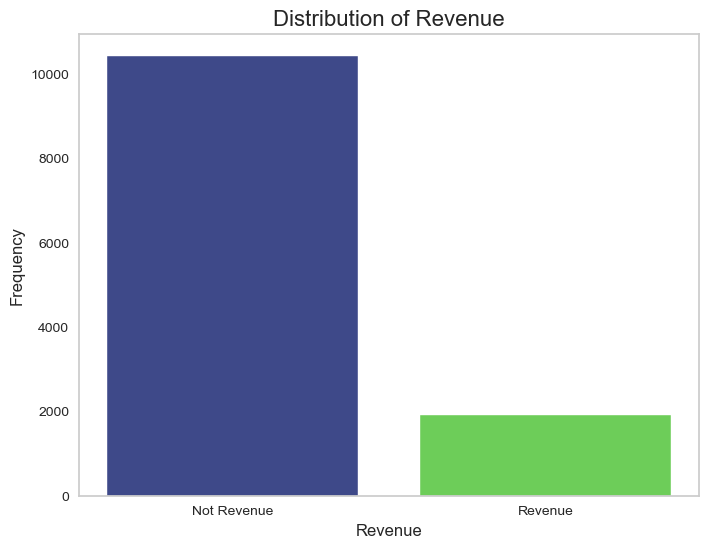

In [14]:
# Plot target variable
target = df.groupby('Revenue').size()

plt.figure(figsize=(8, 6)) 
plt.bar(target.index, target.values, color=['#3E4989', '#6DCD59'])  
plt.title('Distribution of Revenue', fontsize=16)  

plt.xlabel('Revenue', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(target.index, ['Not Revenue', 'Revenue'], rotation=0)  
plt.grid(False)  

plt.show()

In [15]:
first_df = df.rename(columns={"Administrative": "adm", "Administrative_Duration": "adm_dur",
                        "Informational":"inf","Informational_Duration":"inf_dur","ProductRelated":"prod_rel",
                        "ProductRelated_Duration":"prod_rel_dur","BounceRates":"bounces","ExitRates":"exit",
                        "PageValues":"pg_val","SpecialDay":"s_day","Month":"month","OperatingSystems":"os",
                        "Browser":"browser","Region":"reg","TrafficType":"traffic","VisitorType":"visitor",
                        "Weekend":"kend","Revenue":"rev"})

In [16]:
first_df.head()

,adm,adm_dur,inf,inf_dur,prod_rel,prod_rel_dur,bounces,exit,pg_val,s_day,month,os,browser,reg,traffic,visitor,kend,rev
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [17]:
first_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   adm           12330 non-null  int64  
 1   adm_dur       12330 non-null  float64
 2   inf           12330 non-null  int64  
 3   inf_dur       12330 non-null  float64
 4   prod_rel      12330 non-null  int64  
 5   prod_rel_dur  12330 non-null  float64
 6   bounces       12330 non-null  float64
 7   exit          12330 non-null  float64
 8   pg_val        12330 non-null  float64
 9   s_day         12330 non-null  float64
 10  month         12330 non-null  object 
 11  os            12330 non-null  int64  
 12  browser       12330 non-null  int64  
 13  reg           12330 non-null  int64  
 14  traffic       12330 non-null  int64  
 15  visitor       12330 non-null  object 
 16  kend          12330 non-null  bool   
 17  rev           12330 non-null  bool   
dtypes: bool(2), float64(7), in

## 3.2 Data Visualization

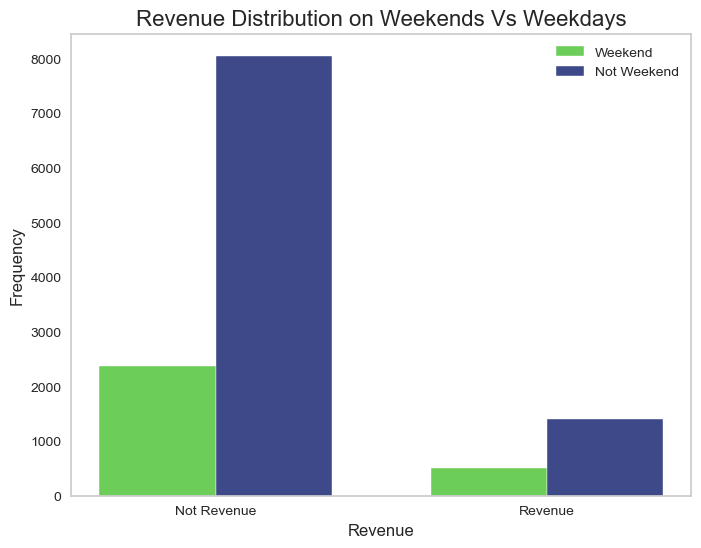

In [18]:
# Plot Revenue Distribution on Weekends Vs Weekdays
grouped_data = df.groupby(['Revenue','Weekend']).size().unstack()

plt.figure(figsize=(8, 6))
bar_width = 0.35
index = np.arange(len(grouped_data.index))

plt.bar(index, grouped_data[True], bar_width, label='Weekend', color='#6DCD59')
plt.bar(index + bar_width, grouped_data[False], bar_width, label='Not Weekend', color='#3E4989')

plt.xlabel('Revenue', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Revenue Distribution on Weekends Vs Weekdays', fontsize=16)
plt.xticks(index + bar_width / 2, ['Not Revenue', 'Revenue'])

plt.grid(False)
plt.legend()
plt.show()

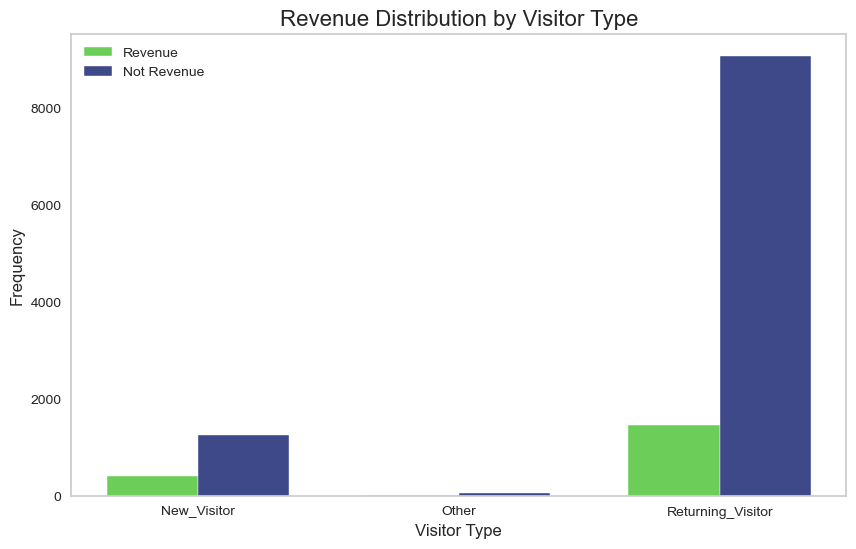

In [19]:
# Plot Revenue Distribution by Visitor Type
visitor_grouped_data = df.groupby(['VisitorType', 'Revenue']).size().unstack()

plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(visitor_grouped_data.index))

plt.bar(index, visitor_grouped_data[True], bar_width, label='Revenue', color='#6DCD59')
plt.bar(index + bar_width, visitor_grouped_data[False], bar_width, label='Not Revenue', color='#3E4989')

plt.xlabel('Visitor Type', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Revenue Distribution by Visitor Type', fontsize=16)
plt.xticks(index + bar_width / 2, visitor_grouped_data.index)

plt.grid(False)
plt.legend()
plt.show()

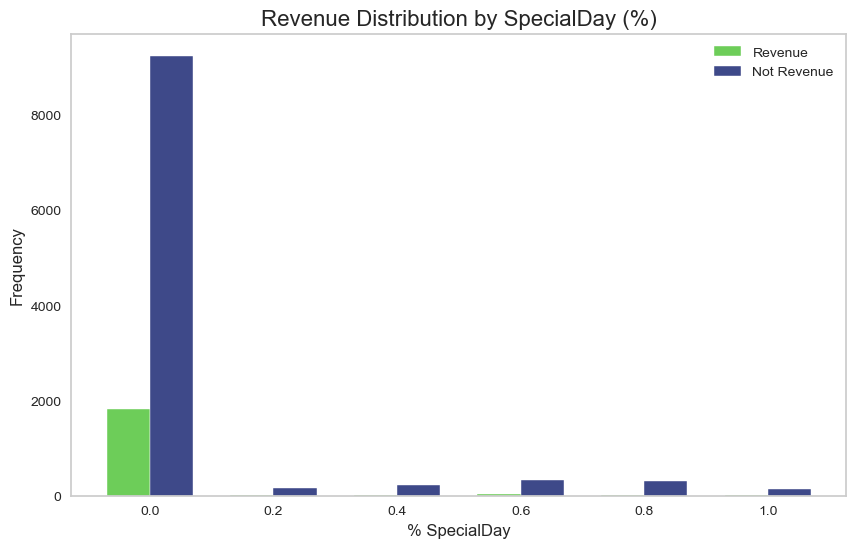

In [20]:
# Plot Revenue Distribution by Visitor Type
visitor_grouped_data = df.groupby(['SpecialDay', 'Revenue']).size().unstack()

plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(visitor_grouped_data.index))

plt.bar(index, visitor_grouped_data[True], bar_width, label='Revenue', color='#6DCD59')
plt.bar(index + bar_width, visitor_grouped_data[False], bar_width, label='Not Revenue', color='#3E4989')

plt.xlabel('% SpecialDay', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Revenue Distribution by SpecialDay (%)', fontsize=16)
plt.xticks(index + bar_width / 2, visitor_grouped_data.index)

plt.grid(False)
plt.legend()
plt.show()

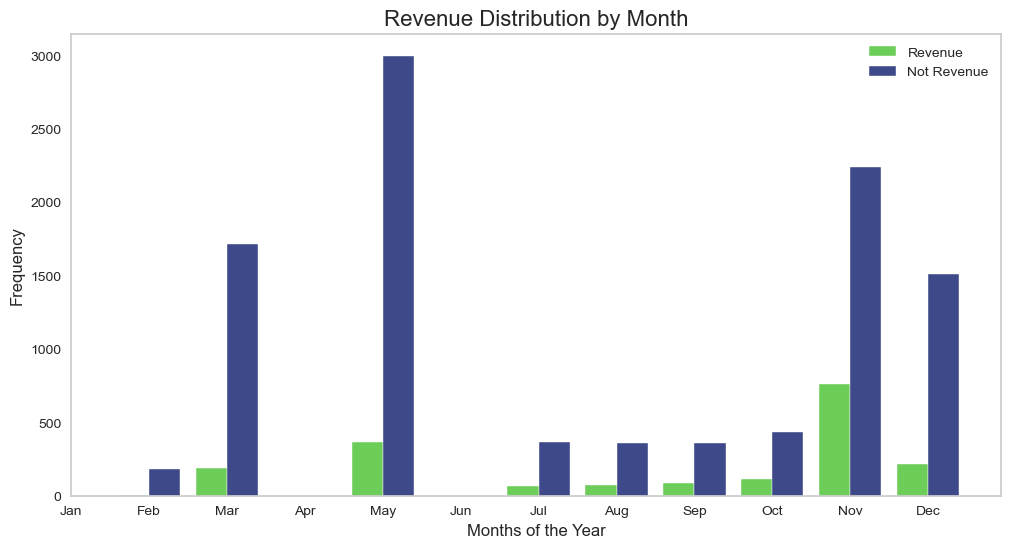

In [21]:
# Order bars per months
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plot Revenue Distribution by Month
revenue_by_month = df.groupby(['Month', 'Revenue']).size().unstack().reindex(month_order)
plt.figure(figsize=(12, 6))
bar_width = 0.4
index = np.arange(len(revenue_by_month.index))

plt.bar(index, revenue_by_month[True], bar_width, label='Revenue', color='#6DCD59')
plt.bar(index + bar_width, revenue_by_month[False], bar_width, label='Not Revenue', color='#3E4989')

plt.xlabel('Months of the Year', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Revenue Distribution by Month', fontsize=16)
plt.xticks(index + bar_width / 2, revenue_by_month.index)

plt.grid(False)
plt.legend()
plt.show()

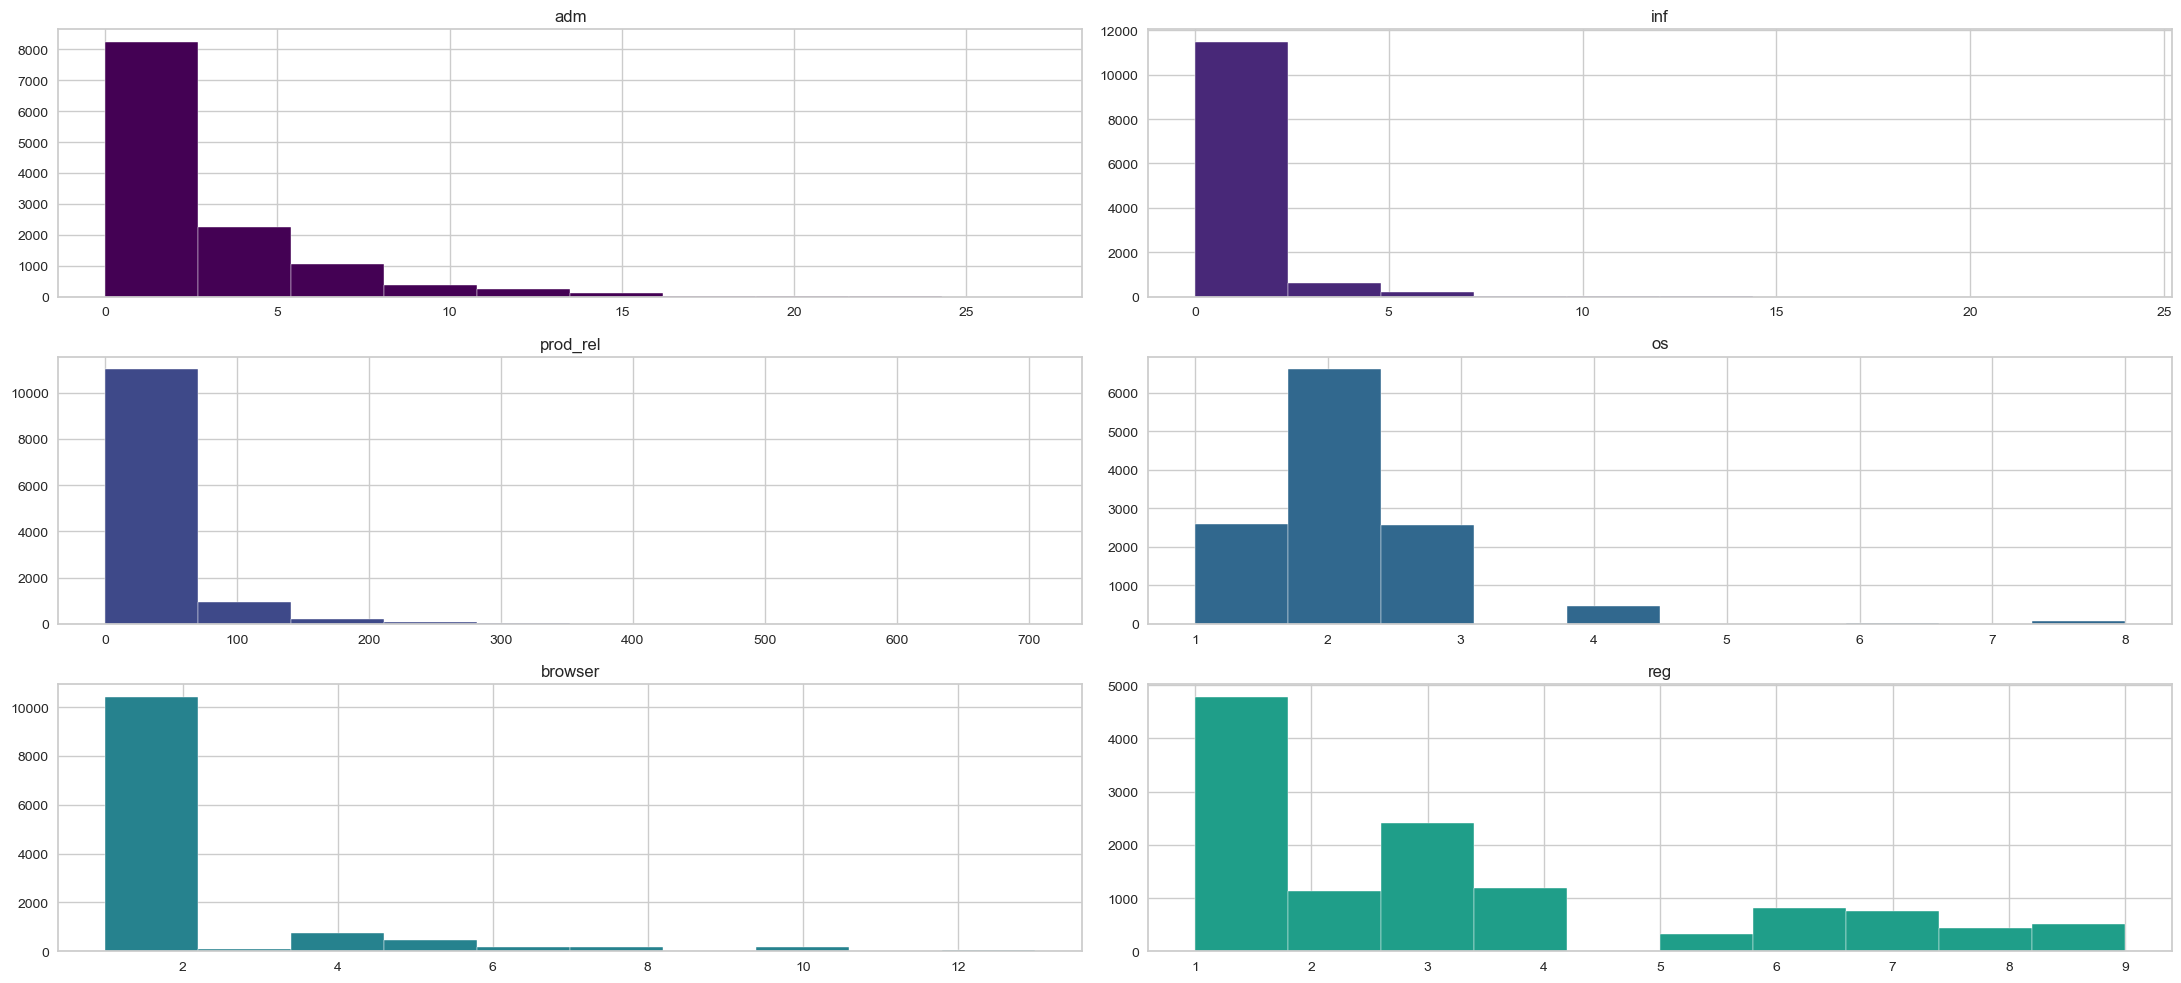

In [22]:
custom_colors = ['#440154', '#482878', '#3E4989', '#31688E', '#26828E', '#1F9E89', '#35B779', '#6DCD59', '#B4DD2C', '#FDE725']

# Plot the distribution of numerical attributes 
ax = first_df.hist(['adm', 'inf', 'prod_rel', 'os', 'browser', 'reg'], figsize=(22, 10), grid=True)

for a, color in zip(ax.flatten(), custom_colors):
    for patch in a.patches:
        patch.set_facecolor(color)  

plt.tight_layout()
plt.show()

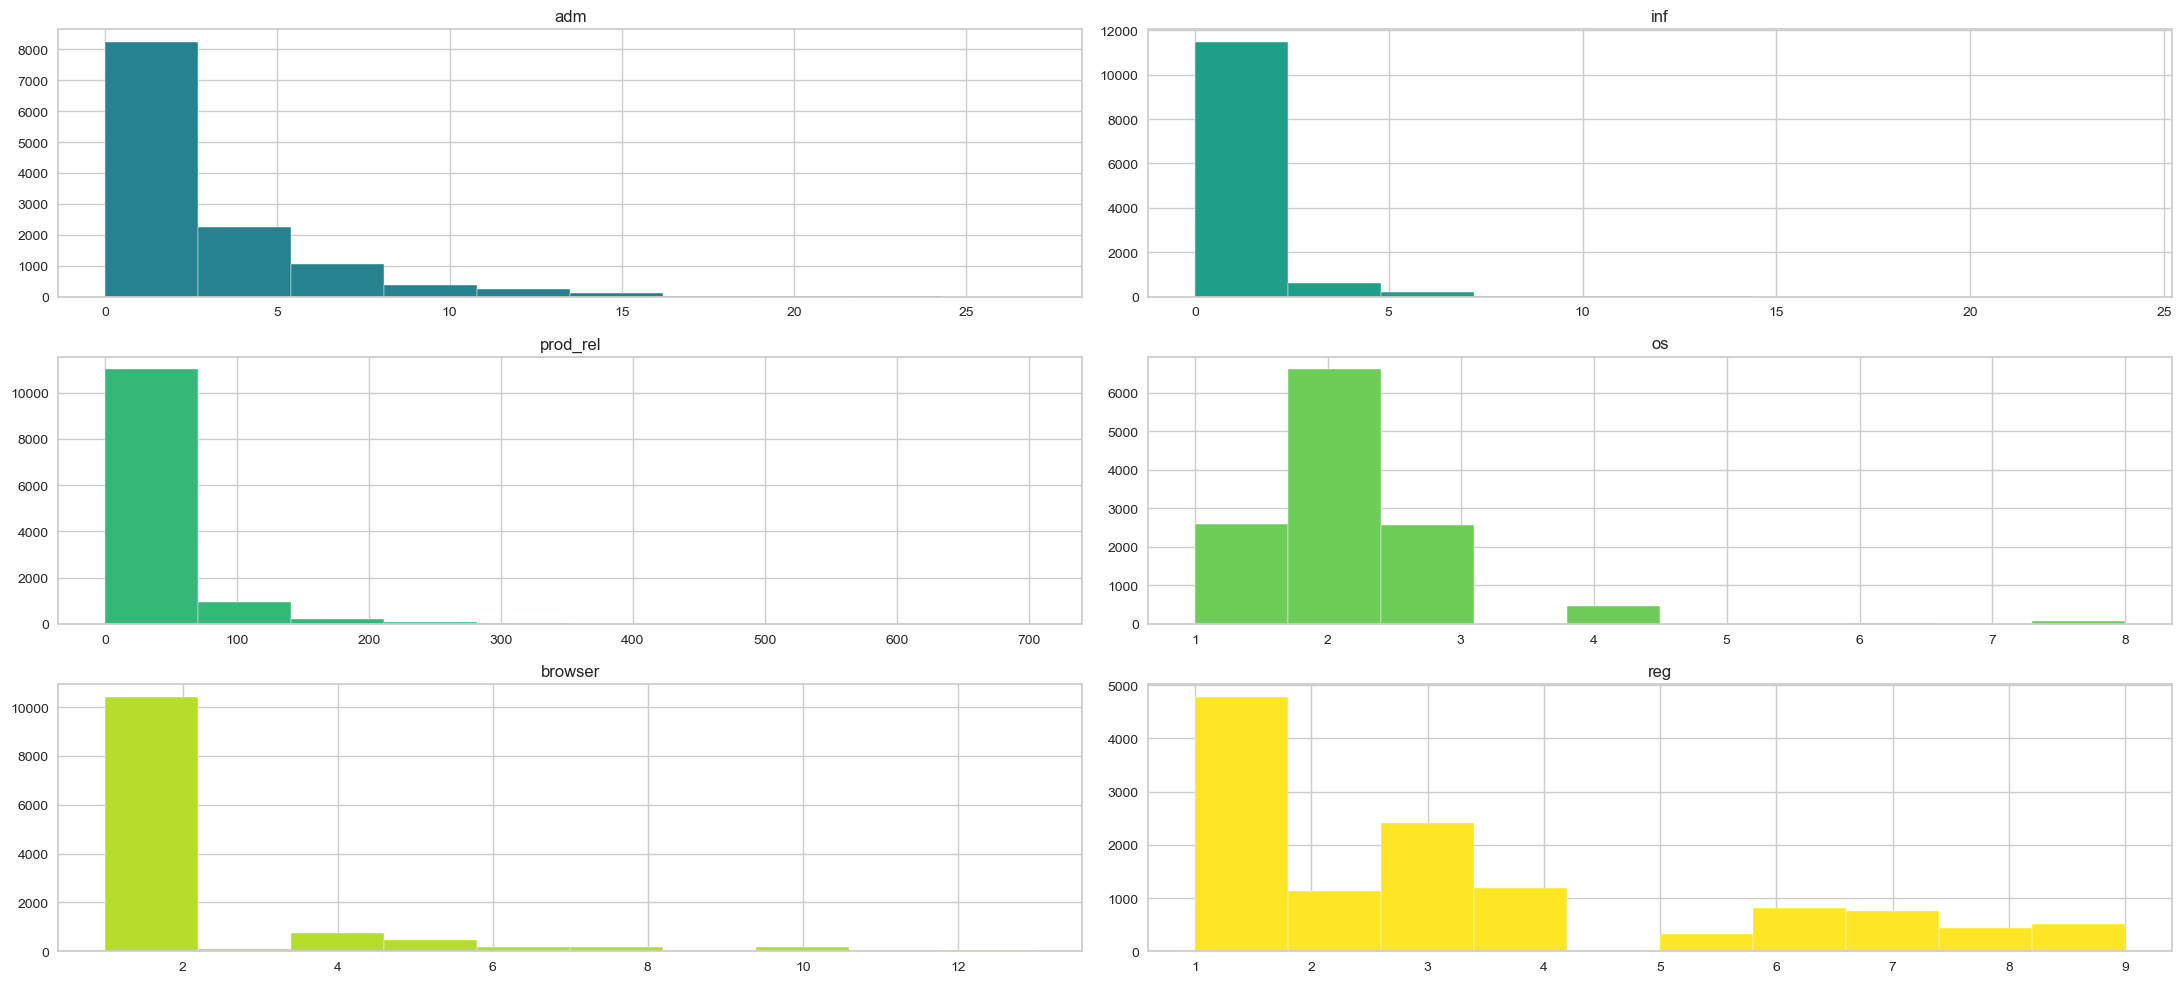

In [23]:
custom_colors = ['#26828E', '#1F9E89', '#35B779', '#6DCD59', '#B4DD2C', '#FDE725']

# Plot the distribution of numerical attributes
ax = first_df.hist(['adm', 'inf', 'prod_rel', 'os', 'browser', 'reg'], figsize=(22, 10), grid=True)

# Accessing individual axes to set colors
for a, color in zip(ax.flatten(), custom_colors):
    for patch in a.patches:
        patch.set_facecolor(color)  

plt.tight_layout()
plt.show()

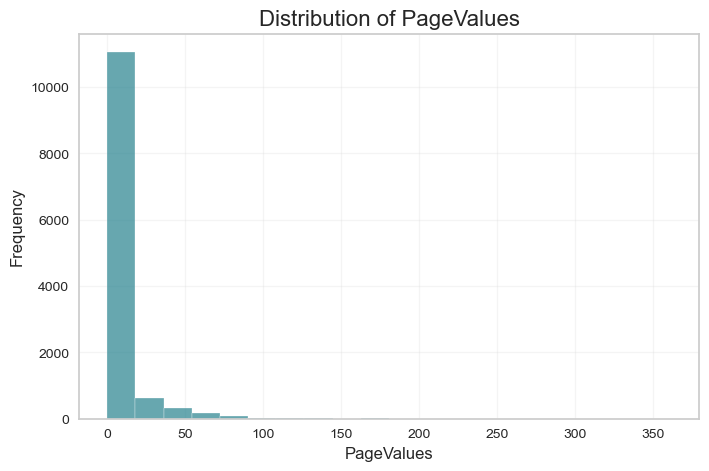

In [24]:
# Plot the distribution of 'PageValues' column
plt.figure(figsize=(8, 5))
plt.hist(first_df['pg_val'], bins=20, alpha=0.7, color='#26828E')
plt.title('Distribution of PageValues', fontsize=16)
plt.xlabel('PageValues', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, alpha=0.2)

plt.show()

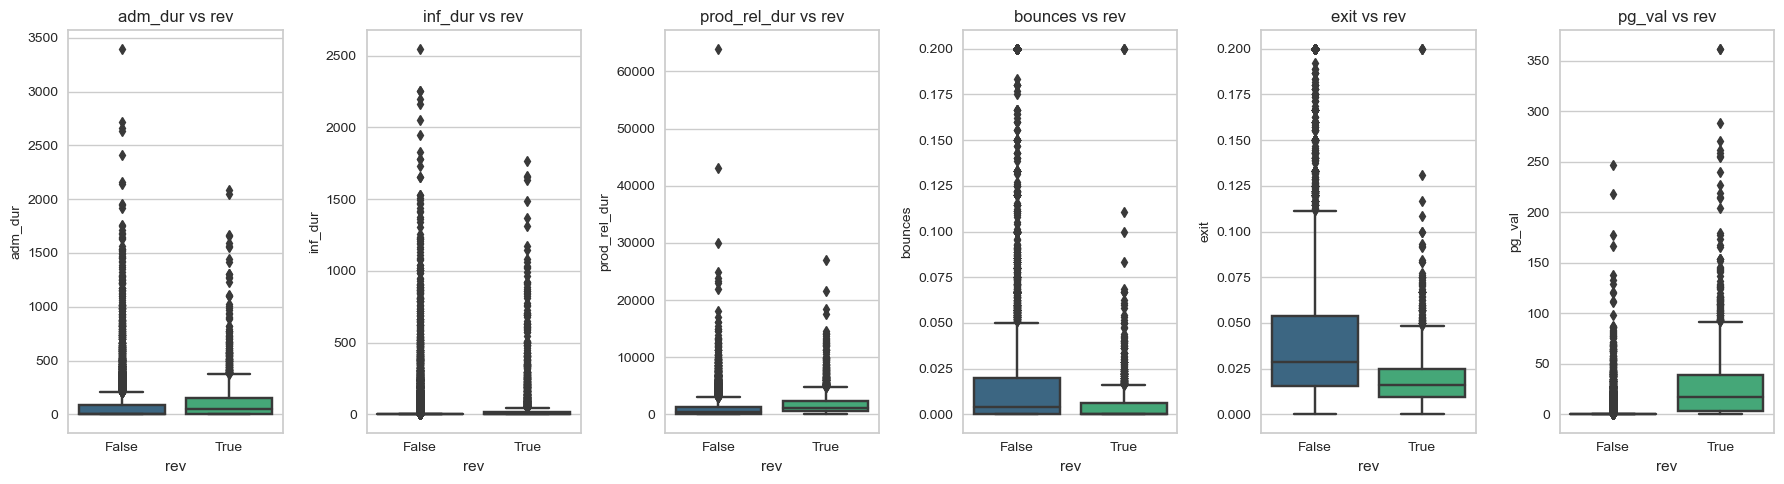

In [25]:
continuousColsList = ['adm_dur', 'inf_dur', 'prod_rel_dur', 'bounces', 'exit', 'pg_val']
viridis_palette = sns.color_palette("viridis", 2)  

fig, PlotCanvas = plt.subplots(nrows=1, ncols=len(continuousColsList), figsize=(18, 5))

# Creating box plots for each continuous predictor against the Target Variable "Revenue"
for PredictorCol, i in zip(continuousColsList, range(len(continuousColsList))):
    sns.boxplot(x='rev', y=PredictorCol, data=first_df, ax=PlotCanvas[i], palette=viridis_palette)
    PlotCanvas[i].set_title(f'{PredictorCol} vs rev', fontsize=12)
    PlotCanvas[i].set_ylabel(PredictorCol, fontsize=10)

plt.tight_layout()
plt.show()

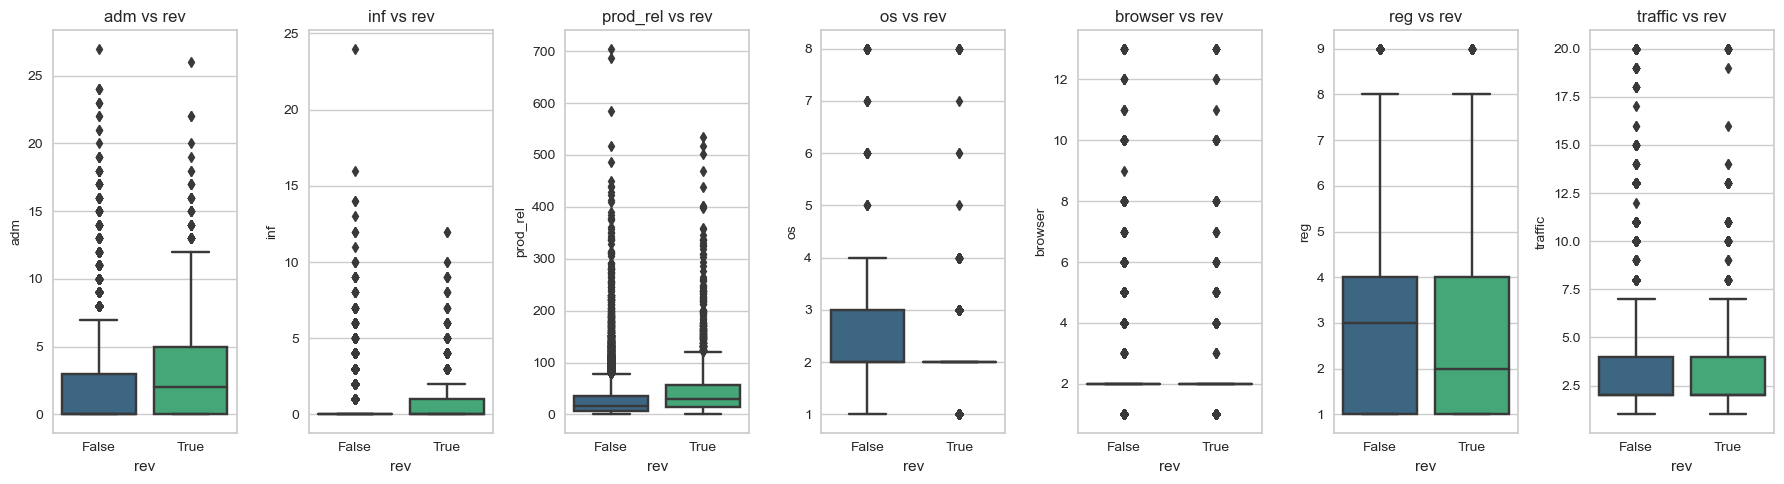

In [26]:
continuousColsList = ['adm', 'inf', 'prod_rel', 'os', 'browser', 'reg', 'traffic']
viridis_palette = sns.color_palette("viridis", 2)  

fig, PlotCanvas = plt.subplots(nrows=1, ncols=len(continuousColsList), figsize=(18, 5))

# Creating box plots for each continuous predictor against the Target Variable "Revenue"
for PredictorCol, i in zip(continuousColsList, range(len(continuousColsList))):
    sns.boxplot(x='rev', y=PredictorCol, data=first_df, ax=PlotCanvas[i], palette=viridis_palette)
    PlotCanvas[i].set_title(f'{PredictorCol} vs rev', fontsize=12)
    PlotCanvas[i].set_ylabel(PredictorCol, fontsize=10)

plt.tight_layout()
plt.show()

## 3.3 Data Pre-processing

In [27]:
# Checking unique values by attribute non numerical
first_df['rev'].unique(), first_df["kend"].unique(), first_df["visitor"].unique(), first_df["month"].unique(),

(array([False,  True]),
 array([False,  True]),
 array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object),
 array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
        'Dec'], dtype=object))

In [28]:
# Transform boolean columns into integers
first_df[['rev', 'kend']] = first_df[['rev', 'kend']].astype(int)

In [29]:
# Define a mapping for month abbreviations to numerical values
month_mapping = {'Feb': 2, 'Mar': 3, 'May': 5, 'Oct': 10, 'June': 6, 'Jul': 7, 'Aug': 8, 'Nov': 11, 'Sep': 9, 'Dec': 12}

# Use the map function to replace values in the 'month' column
first_df['month'] = first_df['month'].replace(month_mapping, inplace=False)

In [30]:
# Define a mapping for 'visitor' values to numerical values
visitor_mapping = {'Returning_Visitor': 0, 'New_Visitor': 1, 'Other': 2}

# Use the replace function with the mapping dictionary
first_df['visitor'] = first_df['visitor'].replace(visitor_mapping, inplace=False)

In [31]:
# Calculate IQR per attribute
Q1 = first_df.quantile(0.25)
Q3 = first_df.quantile(0.75)
IQR = Q3-Q1
#IQR.sort_values(ascending=False)

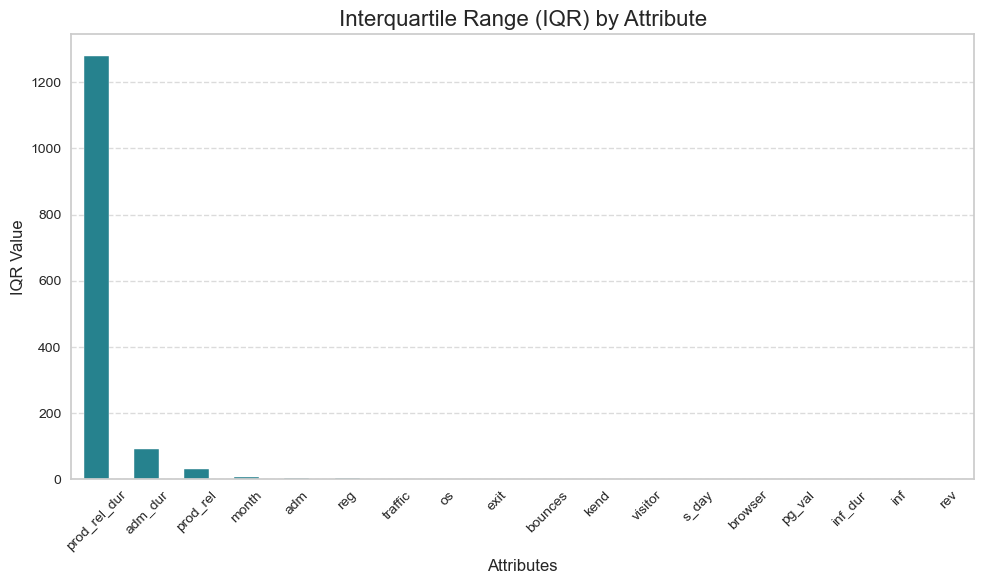

In [32]:
# Plot the IQR values#
plt.figure(figsize=(10, 6))  
IQR.sort_values(ascending=False).plot(kind="bar", color='#26828E') 

plt.title("Interquartile Range (IQR) by Attribute", fontsize=16)  
plt.xlabel("Attributes", fontsize=12)  
plt.ylabel("IQR Value", fontsize=12)  
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.grid(axis='x', linestyle=' ')

plt.tight_layout()
plt.show()

In [33]:
skew_df = first_df.skew()
#skew_df.sort_values(ascending=False)

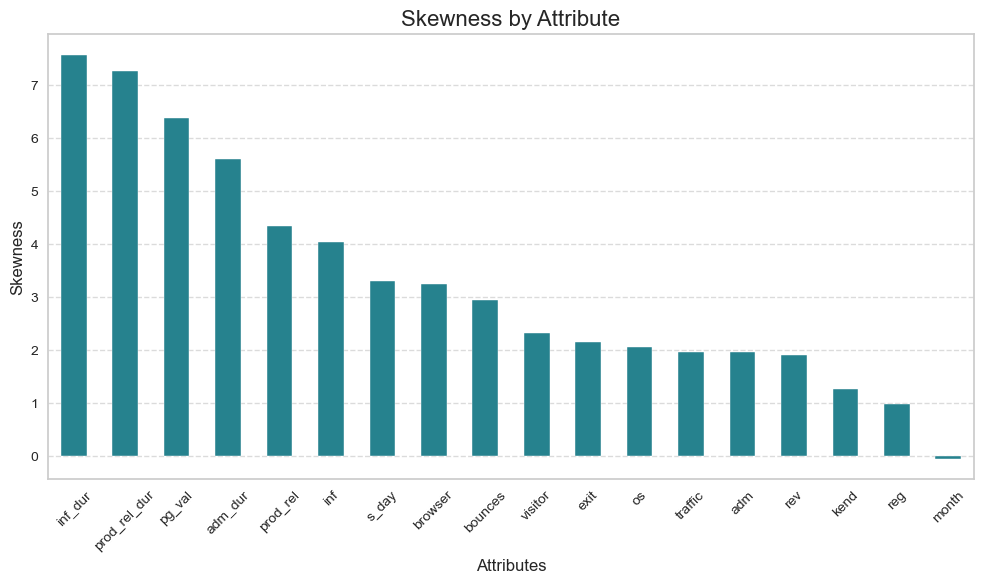

In [34]:
# Plot the skewness values
plt.figure(figsize=(10, 6)) 
skew_df.sort_values(ascending=False).plot(kind="bar", color='#26828E')  

plt.title("Skewness by Attribute", fontsize=16)  
plt.xlabel("Attributes", fontsize=12) 
plt.ylabel("Skewness", fontsize=12)  
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.grid(axis='x', linestyle=' ')

plt.tight_layout()
plt.show()

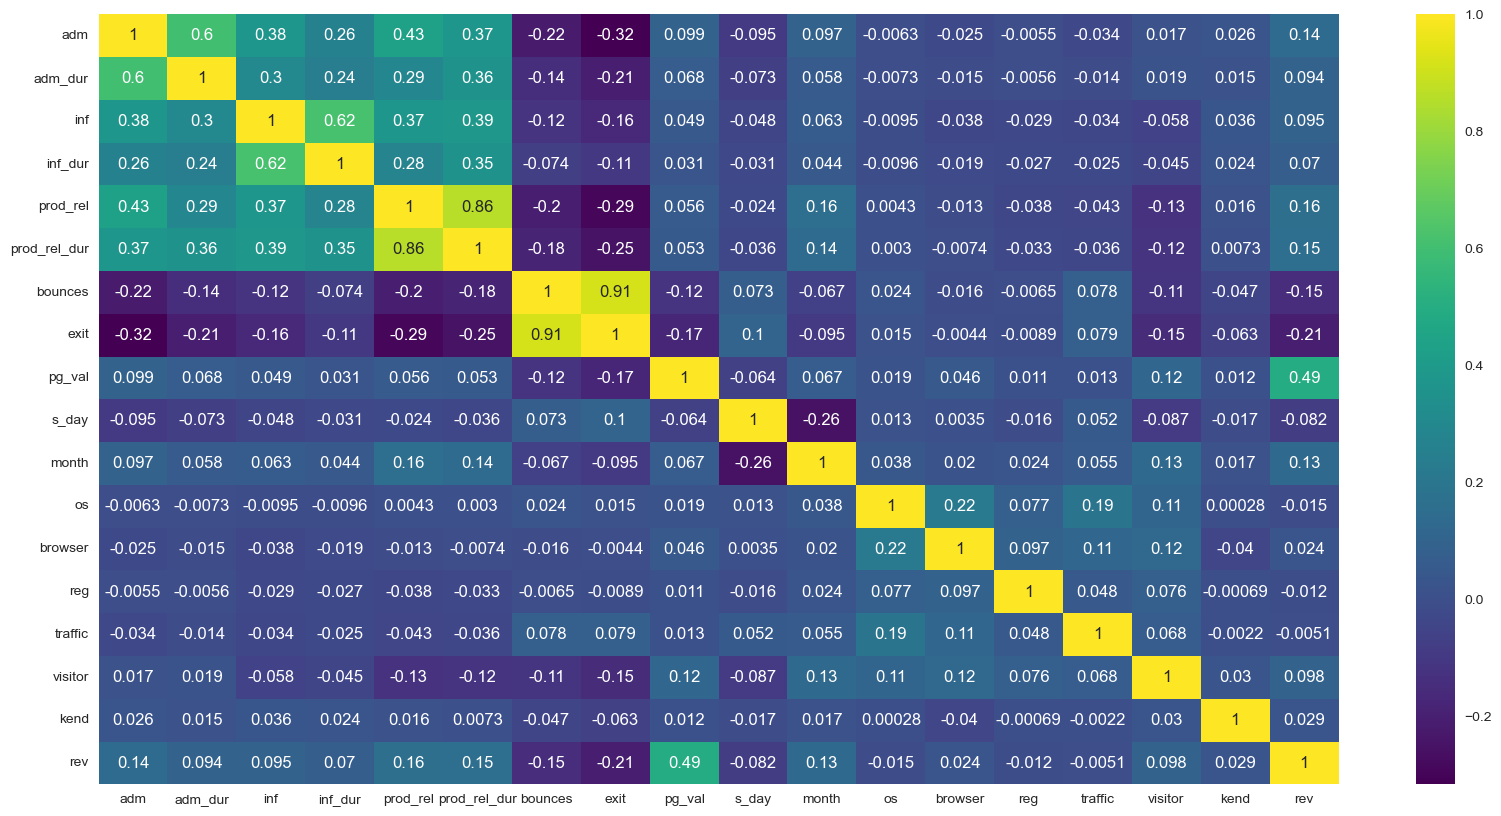

In [35]:
plt.figure(figsize=(20,10))
c = first_df.corr()
sns.heatmap(c,cmap="viridis",annot=True);

## 3.4 Visualizing Clusters: 

### Bounce Rates, Exit Rates, Page Engagement, and Revenue Insights

In [36]:
# Create different dataframe to apply clustering data preparation
cluster_df = first_df.copy()

In [37]:
# Check new columns
cluster_df.head()

,adm,adm_dur,inf,inf_dur,prod_rel,prod_rel_dur,bounces,exit,pg_val,s_day,month,os,browser,reg,traffic,visitor,kend,rev
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,0,1,0


In [38]:
# Create new column with the total number of pages visited
cluster_df['pages_visited_sum'] = cluster_df[['adm', 'inf', 'prod_rel']].sum(axis=1)
# Create new column with the total of duration spent by shoppers
cluster_df['duration_sum'] = cluster_df[['adm_dur', 'inf_dur', 'prod_rel_dur']].sum(axis=1)
# Transform the column created before from minutes to hours for clarity
cluster_df['duration_sum'] /= 60
# Transform values in percentage for clarity
cluster_df[['exit','bounces']] *= 100
# Handle outliers 
cluster_df['duration_sum'] = np.where(cluster_df['duration_sum'] > 300, 300, cluster_df['duration_sum'])

In [39]:
# check transformations
cluster_df.tail()

,adm,adm_dur,inf,inf_dur,prod_rel,prod_rel_dur,bounces,exit,pg_val,s_day,month,os,browser,reg,traffic,visitor,kend,rev,pages_visited_sum,duration_sum
12325,3,145.0,0,0.0,53,1783.791667,0.714286,2.903061,12.241717,0.0,12,4,6,1,1,0,1,0,56,32.146528
12326,0,0.0,0,0.0,5,465.750000,0.000000,2.133333,0.000000,0.0,11,3,2,1,8,0,1,0,5,7.762500
12327,0,0.0,0,0.0,6,184.250000,8.333333,8.666667,0.000000,0.0,11,3,2,1,13,0,1,0,6,3.070833
12328,4,75.0,0,0.0,15,346.000000,0.000000,2.105263,0.000000,0.0,11,2,2,3,11,0,0,0,19,7.016667
12329,0,0.0,0,0.0,3,21.250000,0.000000,6.666667,0.000000,0.0,11,3,2,1,2,1,1,0,3,0.354167


In [40]:
# Select relevant columns for clustering
columns_for_clustering = ['pages_visited_sum', 'duration_sum','bounces','exit']
X = cluster_df[columns_for_clustering]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

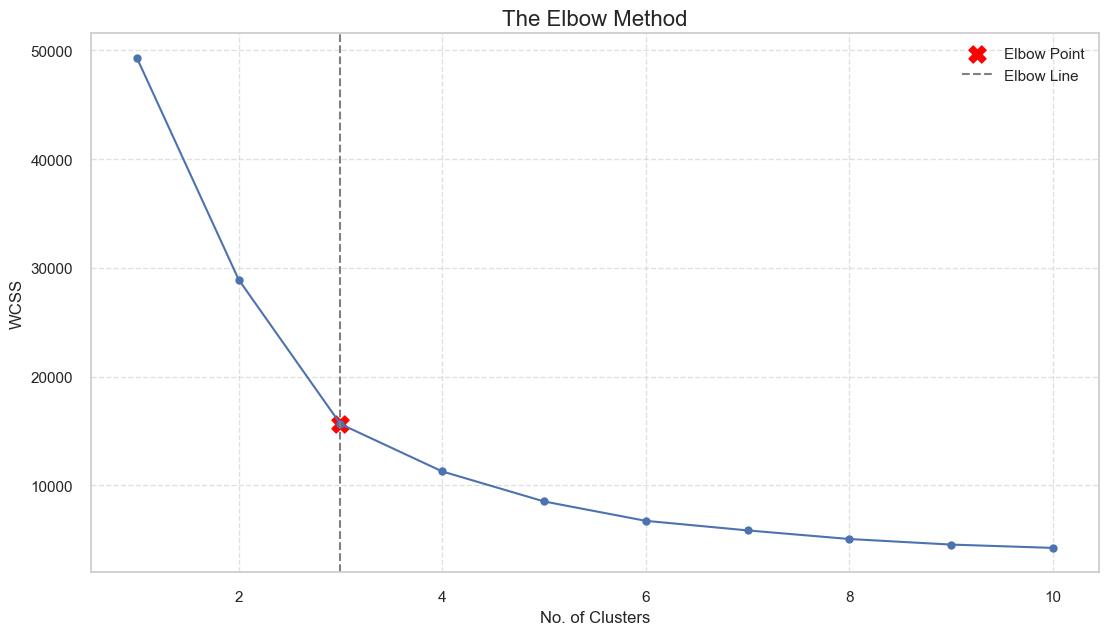

In [41]:
# Apply the Elbow Method
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0, algorithm='full', tol=0.001)
    km.fit(X_scaled)
    wcss.append(km.inertia_)

# Find the elbow point
elbow_point = 3  
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (13, 7)
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.scatter(elbow_point, wcss[elbow_point - 1], c='red', label='Elbow Point', s=150, marker='X')
plt.axvline(x=elbow_point, color='gray', linestyle='--', linewidth=1.5, label='Elbow Line')
plt.grid(True, linestyle='--', alpha=0.6)
plt.title('The Elbow Method', fontsize=16)
plt.xlabel('No. of Clusters', fontsize=12)
plt.ylabel('WCSS', fontsize=12)
plt.legend()
plt.show()

In [42]:
# Number of clusters base on the Elbow Method result
num_clusters = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=38, init='k-means++', n_init=50, algorithm='elkan')
cluster_df['cluster'] = kmeans.fit_predict(X_scaled)

cluster_df['cluster'].value_counts()

cluster
0    10328
1     1030
2      972
Name: count, dtype: int64

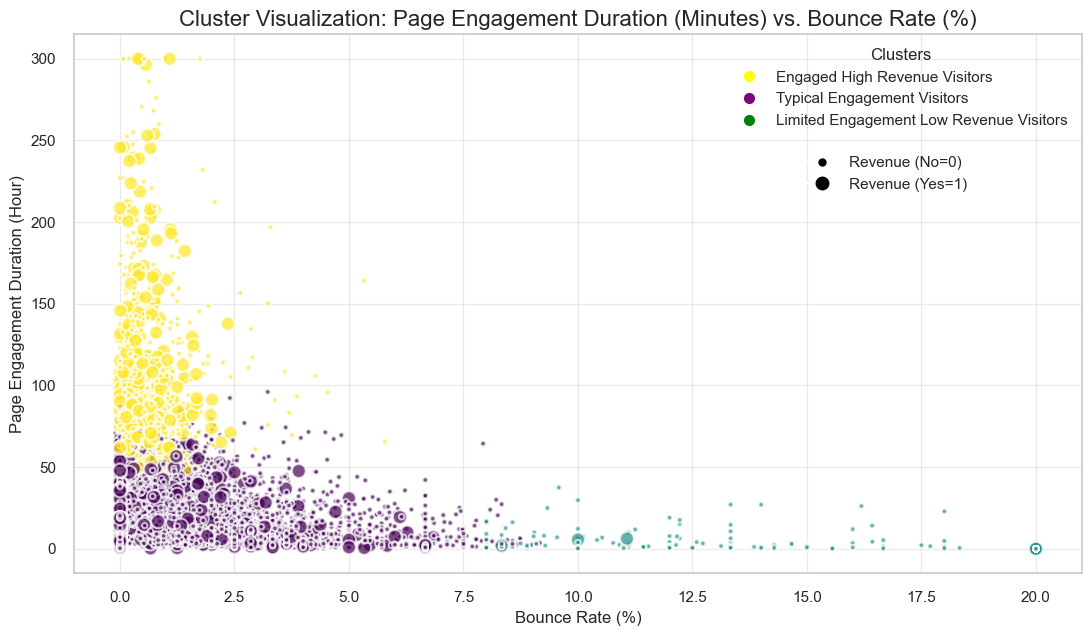

In [43]:
# Define clusters' names
cluster_names = ['Engaged High Revenue Visitors', 
                 'Typical Engagement Visitors', 
                 'Limited Engagement Low Revenue Visitors']

# Visualize Clusters
scatter = sns.scatterplot(x='bounces', y='duration_sum', hue='cluster', hue_order=cluster_names,
               size='rev', sizes=(100, 15), palette='viridis', edgecolors='black', linewidth=1.5, data=cluster_df, alpha=0.7)

plt.title('Cluster Visualization: Page Engagement Duration (Minutes) vs. Bounce Rate (%)', fontsize=16)
plt.xlabel('Bounce Rate (%)', fontsize=12)
plt.ylabel('Page Engagement Duration (Hour)', fontsize=12)


# Set both legends
legend_labels_hue = {f'Cluster {i}': name for i, name in enumerate(cluster_names, start=1)}
handles_hue, _ = scatter.get_legend_handles_labels()

legend_hue = plt.legend([Line2D([0], [0], marker='o', color='w', markerfacecolor='yellow', markersize=8),
                         Line2D([0], [0], marker='o', color='w', markerfacecolor='purple', markersize=8),
                         Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=8)],
                        legend_labels_hue.values(), title='Clusters', loc='upper right')

handles_size = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=6),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=10),
]  
legend_size = plt.legend(handles_size, ['Revenue (No=0)', 'Revenue (Yes=1)'], loc='upper right', 
                         bbox_to_anchor=(0.9, 0.8))
# Plot visualization
plt.gca().add_artist(legend_hue)
plt.grid(alpha=0.4)
plt.show()

In [44]:
# Print a few examples from each cluster
cluster_centers = kmeans.cluster_centers_

for i in range(num_clusters):
    cluster_samples = cluster_df[cluster_df['cluster'] == i].sample(5)  # Displaying 5 samples from each cluster
    print(f"\nExamples from Cluster {i + 1}:")
    print(cluster_samples[columns_for_clustering])


Examples from Cluster 1:
       pages_visited_sum  duration_sum   bounces      exit
4807                  59     22.694841  0.188679  1.069182
6745                  13      6.538333  3.636364  5.454546
10613                 15      4.048611  0.666667  0.666667
6546                   9     15.316667  0.000000  5.555556
7295                   5      1.613333  0.000000  2.000000

Examples from Cluster 2:
      pages_visited_sum  duration_sum    bounces       exit
1356                  2      0.000000  20.000000  20.000000
9864                  1      0.000000  20.000000  20.000000
2151                  4      0.000000  20.000000  20.000000
5405                 24      5.400000  10.416667  13.194444
2812                  3      1.083333  11.111111  17.777778

Examples from Cluster 3:
       pages_visited_sum  duration_sum   bounces      exit
5153                 137    116.499040  0.298507  0.882467
8284                 175     93.481831  0.485909  1.466783
11094                 79     78

Your cluster names provide a good foundation, but to make them more descriptive and easier to understand, you might consider the following suggestions:

1. **Engaged High Revenue Visitors:**
   - Description: Visitors with high engagement (Duration > 50h), low bounce rate (< 5%), and a majority of revenue generated.

2. **Typical Engagement Visitors:**
   - Description: The largest cluster with moderate engagement (Duration up to 50h) and moderate bounce rate (up to 10%), generating a few revenues.

3. **Limited Engagement Low Revenue Visitors:**
   - Description: Visitors with low engagement (small duration) and high bounce rate (> 10%), with the majority not generating revenue.

These suggestions aim to provide more clarity about the characteristics of each cluster, making it easier for others to interpret and understand the results of your clustering analysis. Feel free to adjust the names based on the nuances of your data and your audience's understanding.

# 4. Data Preparation

## 4.1 Data Engineering

In [45]:
# Finging unique values for each column
# To understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is
# likely to be a category otherwise continuous

In [46]:
# Create dict without target variable
table_counts = first_df.drop('rev', axis=1).nunique().to_dict()

In [47]:
# Create lists based on counts
categorical_list = [item for item, count in table_counts.items() if count < 30]
numerical_list = [item for item, count in table_counts.items() if count >= 30]

# Print or use the lists as needed
print("Categorical:", categorical_list)
print("Numerical:", numerical_list)

Categorical: ['adm', 'inf', 's_day', 'month', 'os', 'browser', 'reg', 'traffic', 'visitor', 'kend']
Numerical: ['adm_dur', 'inf_dur', 'prod_rel', 'prod_rel_dur', 'bounces', 'exit', 'pg_val']


In [48]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)

        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    return(SelectedPredictors)

In [49]:
# Calling the function to check which categorical variables are correlated with target
continuousVariables = categorical_list
FunctionAnova(first_df, 'rev', continuousVariables )

##### ANOVA Results ##### 

adm is correlated with rev | P-Value: 3.519759837717179e-54
inf is correlated with rev | P-Value: 3.1740343112109894e-26
s_day is correlated with rev | P-Value: 5.498934260139406e-20
month is correlated with rev | P-Value: 9.17951243284699e-46
os is NOT correlated with rev | P-Value: 0.10339431070882842
browser is correlated with rev | P-Value: 0.007736888294824106
reg is NOT correlated with rev | P-Value: 0.19794262499095086
traffic is NOT correlated with rev | P-Value: 0.5702433635869331
visitor is correlated with rev | P-Value: 5.861359983891014e-28
kend is correlated with rev | P-Value: 0.0011405626259445205


['adm', 'inf', 's_day', 'month', 'browser', 'visitor', 'kend']

In [50]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)

        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])

    return(SelectedPredictors)

In [51]:
categoricalVariables = numerical_list

# Calling the function
FunctionChisq(first_df, 'rev', categoricalVariables)

adm_dur is correlated with rev | P-Value: 3.0916911627226634e-68
inf_dur is correlated with rev | P-Value: 5.5336715155252504e-34
prod_rel is correlated with rev | P-Value: 1.2201453528044542e-69
prod_rel_dur is correlated with rev | P-Value: 5.129549976526522e-32
bounces is correlated with rev | P-Value: 2.835234062143618e-21
exit is correlated with rev | P-Value: 3.183048182750372e-38
pg_val is correlated with rev | P-Value: 0.0


['adm_dur', 'inf_dur', 'prod_rel', 'prod_rel_dur', 'bounces', 'exit', 'pg_val']

In [52]:
first_df.columns

Index(['adm', 'adm_dur', 'inf', 'inf_dur', 'prod_rel', 'prod_rel_dur',
       'bounces', 'exit', 'pg_val', 's_day', 'month', 'os', 'browser', 'reg',
       'traffic', 'visitor', 'kend', 'rev'],
      dtype='object')

In [53]:
selectColumns = ['adm', 'adm_dur', 'inf', 'inf_dur', 'prod_rel', 'prod_rel_dur',
       'bounces', 'exit', 'pg_val', 's_day', 'month', 'browser', 'visitor', 'kend', 'rev']
# Selecting final columns
DataForML= first_df[selectColumns]
DataForML.head()

,adm,adm_dur,inf,inf_dur,prod_rel,prod_rel_dur,bounces,exit,pg_val,s_day,month,browser,visitor,kend,rev
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,2,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,0,1,0


In [54]:
DataForML.shape

(12330, 15)

## 4.2 Split dataset into X and y

In [55]:
# splitting into X and y
X = DataForML.drop("rev", axis = 1)
y = DataForML['rev']

In [56]:
X = X.values
y = y.values

## 4.3 Nomalization | Scaling

In [57]:
# Scale data using Robust Scaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

## 4.4 Balance Dataset

### 4.4.1 SMOTE technique

In [58]:
# Count Target Variable
DataForML['rev'].value_counts()

rev
0    10422
1     1908
Name: count, dtype: int64

In [59]:
# Apply SMOTE technique to balance the data
smt = SMOTE()
X_smote, y_smote = smt.fit_resample(X_scaled, y)

In [60]:
np.bincount(y_smote)

array([10422, 10422], dtype=int64)

## 4.5 Establish Train and Test

In [61]:
# Split the data: Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state = 38)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16675, 14), (4169, 14), (16675,), (4169,))

# 5. Model Building and Evaluation

## 5.1 Building Decision Tree Model

### 5.1.1 Apply Decision Tree Model

In [62]:
# Fitting the model with default hyperparameters
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [63]:
# Make predictions
predictions_dtree = dtree.predict(X_test)

# Print classification report
print(classification_report(y_test, predictions_dtree))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      2014
           1       0.90      0.91      0.90      2155

    accuracy                           0.90      4169
   macro avg       0.90      0.90      0.90      4169
weighted avg       0.90      0.90      0.90      4169



### 5.1.1.1 Apply Stratified KFold to validate DTREE model with default hyperparameters

In [64]:
n_folds = 10

In [65]:
# Create a StratifiedKFold object
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=38)

# Perform cross-validation
cv_results_dtree = cross_val_score(dtree, X_train, y_train, cv=stratified_kfold, scoring='accuracy')

# Print the cross-validation results
print("Cross-validation results:", cv_results_dtree)

Cross-validation results: [0.90227818 0.89568345 0.88489209 0.9028777  0.89808153 0.89622076
 0.90821836 0.90461908 0.895021   0.89742052]


In [66]:
# Average, minimum and maximum scores
dtree_min_score = cv_results_dtree.min()
dtree_max_score = cv_results_dtree.max()
dtree_mean_score = cv_results_dtree.mean()

# Find the minimum and maximum scores
print(f"The minimum accuracy score is: {dtree_min_score} and the maximum accuracy score is: {dtree_max_score} across {n_folds} folds.")
print(f"The average accuracy score is: {dtree_mean_score}.")

The minimum accuracy score is: 0.8848920863309353 and the maximum accuracy score is: 0.9082183563287343 across 10 folds.
The average accuracy score is: 0.8985312649700277.


### 5.1.2 Find Optimal Hyperparameters using GridSearchCV

In [67]:
# Create the parameter grid
param_grid = {
    'max_depth': range(5, 8, 15),
    'criterion': ["entropy", "gini"],
    'min_samples_leaf': [10, 30, 50]
}

n_folds = 10
stratified_kfold = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=38)

# Instantiate the GridSearchCV model
dtree = DecisionTreeClassifier()
dtree_gridsearchcv = GridSearchCV(estimator = dtree, param_grid = param_grid,
                          cv = stratified_kfold, verbose = 1)

# Fit the GridSearchCV to the data
dtree_gridsearchcv.fit(X_train,y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=38, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 8, 15),
                         'min_samples_leaf': [10, 30, 50]},
             verbose=1)

In [68]:
# GridSearchCV results
dtree_results = pd.DataFrame(dtree_gridsearchcv.cv_results_)
dtree_results_display = dtree_results[['rank_test_score','mean_test_score','param_criterion','param_max_depth',
                         'param_min_samples_leaf']].sort_values('rank_test_score')
dtree_results_display

,rank_test_score,mean_test_score,param_criterion,param_max_depth,param_min_samples_leaf
4,1,0.871245,gini,5,30
0,2,0.870945,entropy,5,10
5,3,0.870886,gini,5,50
2,4,0.870885,entropy,5,50
3,5,0.870885,gini,5,10
1,6,0.870825,entropy,5,30


In [69]:
# printing the optimal accuracy score and hyperparameters
print(f"The best accuracy we can get accuracy of {dtree_gridsearchcv.best_estimator_}")

The best accuracy we can get accuracy of DecisionTreeClassifier(max_depth=5, min_samples_leaf=30)


In [70]:
dtree_results_scores = dtree_results[['rank_test_score','mean_test_score','split0_test_score','split1_test_score','split2_test_score','split3_test_score',
                       'split4_test_score','split5_test_score','split6_test_score','split7_test_score',
                       'split8_test_score','split9_test_score',]].sort_values('rank_test_score').head(1)
dtree_results_scores

,rank_test_score,mean_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score
4,1,0.871245,0.874101,0.86211,0.865108,0.863909,0.877098,0.863827,0.884823,0.872226,0.878824,0.870426


In [71]:
# Average, minimum and maximum scores
min_max = dtree_results_scores.iloc[:,2:].melt()
rfc_min_score = min_max.value.min()
rfc_max_score = min_max.value.max()
rfc_mean_score = min_max.value.mean()

# Find the minimum and maximum scores
print(f"The minimum accuracy score is: {rfc_min_score} and the maximum accuracy score is: {rfc_max_score} across {n_folds} folds.")
print(f"The average accuracy score is: {rfc_mean_score}.")

The minimum accuracy score is: 0.8621103117505995 and the maximum accuracy score is: 0.8848230353929214 across 10 folds.
The average accuracy score is: 0.8712452113893768.


### 5.1.3 Apply Decision Tree Model with best Hyperparameters obtained from GridSearchCV.

In [72]:
# Fit the model with optimal hyperparameters
dtree_best = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 38,
                                  max_depth=5,
                                  min_samples_leaf=30)

dtree_best.fit(X_train, y_train)

# Accuracy score
print(f"The best accuracy using Decision Tree Model and GridSearchCV Tunning: {dtree_best.score(X_test,y_test)} across {n_folds} folds.")

The best accuracy using Decision Tree Model and GridSearchCV Tunning: 0.8740705205085152 across 10 folds.


### 5.1.4 Evaluation Decision Tree Model

In [73]:
# Print classification report
predictions_dtree = dtree_best.predict(X_test)
print(classification_report(y_test, predictions_dtree))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      2014
           1       0.91      0.84      0.87      2155

    accuracy                           0.87      4169
   macro avg       0.88      0.88      0.87      4169
weighted avg       0.88      0.87      0.87      4169



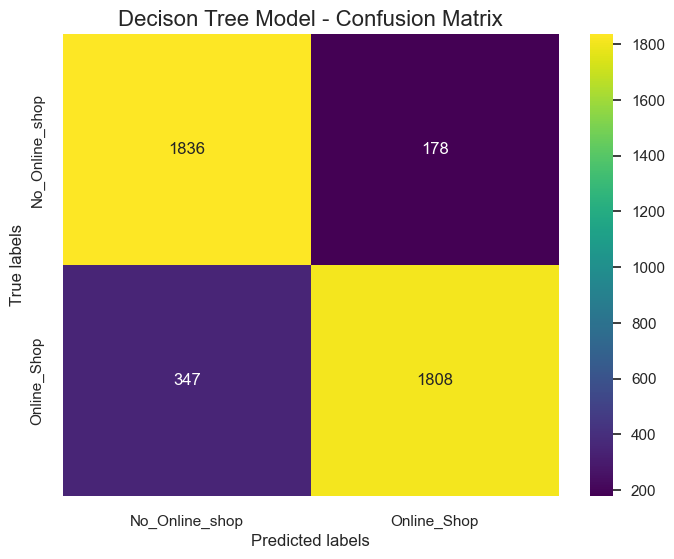

In [74]:
# Confusion matrix
labels = ['No_Online_shop', 'Online_Shop']
cm = confusion_matrix(y_test, predictions_dtree)

plt.figure(figsize=(8, 6))
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, cmap='viridis', fmt='g')

ax.set_xlabel('Predicted labels',fontsize=12)
ax.set_ylabel('True labels',fontsize=12)
ax.set_title('Decison Tree Model - Confusion Matrix',fontsize=16)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels);

### 5.1.5 Plotting Decision Tree

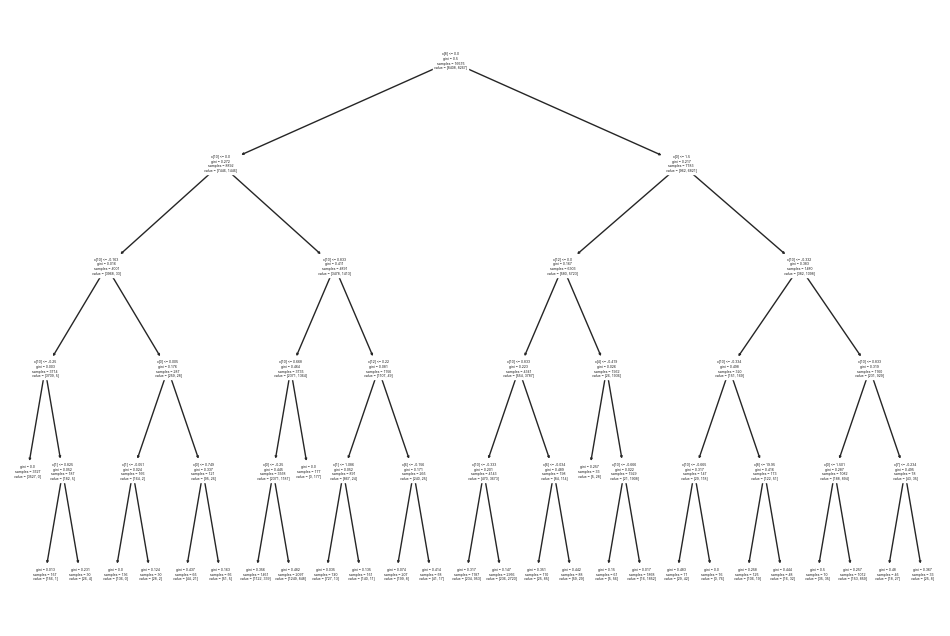

In [75]:
# Display the tree by calling a method plot_tree()
plt.figure(figsize = (12, 8))
tree.plot_tree(dtree_best);

### 5.1.6 Reduce the max_depth to improve the tree visualization

In [76]:
# Reduce max_depth to improve visualization
dtree_best_maxd = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 38,
                                  max_depth=3,
                                  min_samples_leaf=50
                                  )
dtree_best_maxd.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=50, random_state=38)

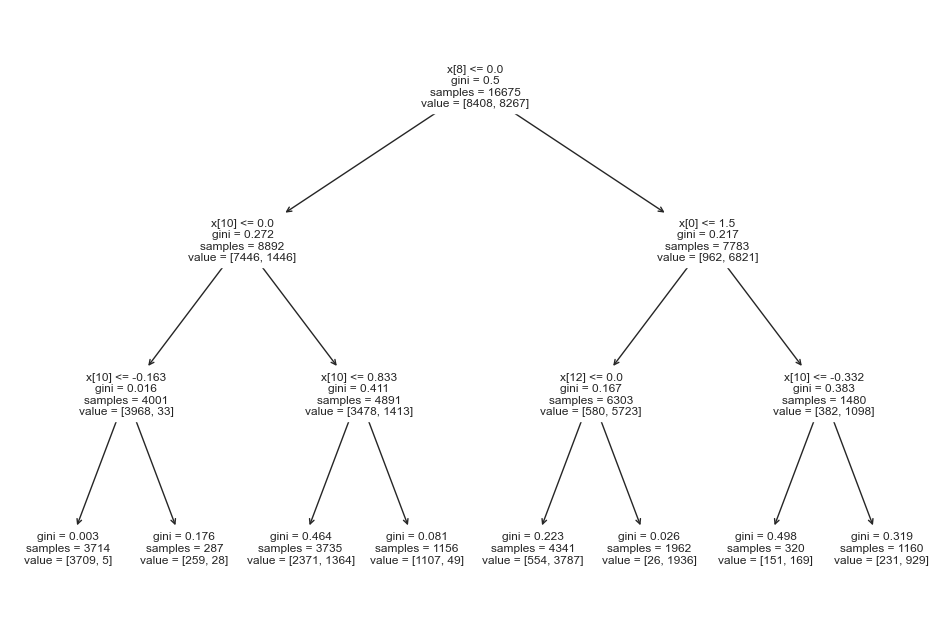

In [77]:
# Display the tree by calling a method plot_tree()
plt.figure(figsize = (12, 8))
tree.plot_tree(dtree_best_maxd);

## 5.2 Building SVM Model

### 5.2.1 Apply SVM Model

In [78]:
# Fit the model with default hyperparameters
svm = SVC()
svm.fit(X_train,y_train)

SVC()

In [79]:
# Making predictions
predictions_svm = svm.predict(X_test)

In [80]:
# Print classification report
print(classification_report(y_test,predictions_svm))

              precision    recall  f1-score   support

           0       0.76      0.88      0.82      2014
           1       0.87      0.74      0.80      2155

    accuracy                           0.81      4169
   macro avg       0.81      0.81      0.81      4169
weighted avg       0.82      0.81      0.81      4169



### 5.2.1.1 Apply Stratified KFold to validate SVM model with default hyperparameters

In [81]:
# Create a StratifiedKFold object
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=38)

# Perform cross-validation
cv_results_svm = cross_val_score(svm, X_train, y_train, cv=stratified_kfold, scoring='accuracy')

# Print the cross-validation results
print("Cross-validation results:", cv_results_svm)

Cross-validation results: [0.80155875 0.79856115 0.80935252 0.79916067 0.80455635 0.81523695
 0.81343731 0.80983803 0.81523695 0.80203959]


In [82]:
# Average, minimum and maximum scores
svm_min_score = cv_results_svm.min()
svm_max_score = cv_results_svm.max()
svm_mean_score = cv_results_svm.mean()

# Find the minimum and maximum scores
print(f"The minimum accuracy score is: {svm_min_score} and the maximum accuracy score is: {svm_max_score} across {n_folds} folds.")
print(f"The average accuracy score is: {svm_mean_score}.")

The minimum accuracy score is: 0.7985611510791367 and the maximum accuracy score is: 0.8152369526094781 across 10 folds.
The average accuracy score is: 0.8068978290672801.


### 5.2.2 Find Optimal Hyperparameters using GridSearchCV

In [83]:
# Create the parameter grid based on the results of random search
param_grid = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]

# specify model
svm = SVC(kernel = "rbf")   # tested 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'

n_folds = 10
stratified_kfold = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=38)

# Instantiate the GridSearchCV model
svm_gridsearchcv = GridSearchCV(estimator = svm, param_grid = param_grid,
                          cv = n_folds, n_jobs = -1, verbose = 1) 

In [84]:
# Fit the GridSearchCV to the data
svm_gridsearchcv.fit(X_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             verbose=1)

In [85]:
# GridSearchCV results
svm_results = pd.DataFrame(svm_gridsearchcv.cv_results_)

svm_results_display = svm_results[['rank_test_score','mean_test_score',
                                   'param_C','param_gamma']].sort_values('rank_test_score')
svm_results_display

,rank_test_score,mean_test_score,param_C,param_gamma
9,1,0.893793,1000,0.01
6,2,0.878800,100,0.01
3,3,0.869565,10,0.01
10,4,0.865846,1000,0.001
7,5,0.857391,100,0.001
0,6,0.851573,1,0.01
4,7,0.850134,10,0.001
11,8,0.843897,1000,0.0001
8,9,0.838020,100,0.0001
1,10,0.836701,1,0.001


In [86]:
# printing the optimal accuracy score and hyperparameters
print(f"The best accuracy we can get accuracy of {svm_gridsearchcv.best_estimator_}")

The best accuracy we can get accuracy of SVC(C=1000, gamma=0.01)


In [87]:
svm_results_scores = svm_results[['rank_test_score','mean_test_score','split0_test_score','split1_test_score','split2_test_score','split3_test_score',
                       'split4_test_score','split5_test_score','split6_test_score','split7_test_score',
                       'split8_test_score','split9_test_score',]].sort_values('rank_test_score').head(1)
svm_results_scores

,rank_test_score,mean_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score
9,1,0.893793,0.90048,0.890288,0.897482,0.896882,0.886691,0.90102,0.889022,0.886623,0.90102,0.888422


In [88]:
# Average, minimum and maximum scores
min_max = svm_results_scores.iloc[:,2:].melt()
svm_min_score = min_max.value.min()
svm_max_score = min_max.value.max()
svm_mean_score = min_max.value.mean()

# Find the minimum and maximum scores
print(f"The minimum accuracy score is: {svm_min_score} and the maximum accuracy score is: {svm_max_score} across {n_folds} folds.")
print(f"The average accuracy score is: {svm_mean_score}.")

The minimum accuracy score is: 0.886622675464907 and the maximum accuracy score is: 0.9010197960407919 across 10 folds.
The average accuracy score is: 0.8937929320610698.


### 5.2.3 Apply SVM Model with best Hyperparameters obtained from GridSearchCV.

In [89]:
# Fit the model with optimal hyperparameters
svm_best = SVC(C=1000, gamma=0.01, kernel="rbf")

svm_best.fit(X_train, y_train)

# Accuracy score
print(f"The best accuracy using Ranfom Forest Classifier Model and GridSearchCV Tunning: {svm_best.score(X_test,y_test)}.")

The best accuracy using Ranfom Forest Classifier Model and GridSearchCV Tunning: 0.8925401775005997.


### 5.2.4 Evaluation SVM Model

In [90]:
# Make predictions
predictions_svm = svm_best.predict(X_test)

# Print classification report
print(classification_report(y_test,predictions_svm))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      2014
           1       0.91      0.88      0.89      2155

    accuracy                           0.89      4169
   macro avg       0.89      0.89      0.89      4169
weighted avg       0.89      0.89      0.89      4169



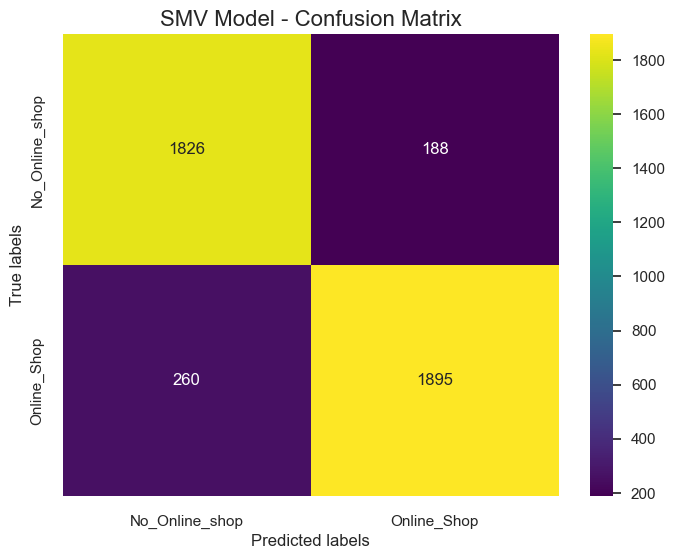

In [91]:
# Confusion matrix
labels = ['No_Online_shop', 'Online_Shop']
cm = confusion_matrix(y_test, predictions_svm)

plt.figure(figsize=(8, 6))
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, cmap='viridis', fmt='g')

ax.set_xlabel('Predicted labels',fontsize=12)
ax.set_ylabel('True labels',fontsize=12)
ax.set_title('SMV Model - Confusion Matrix',fontsize=16)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels);

## 5.3 Building Random Forest Model

### 5.3.1 Apply Random Forest Model

In [92]:
# Fit the model with default hyperparameters
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [93]:
# Making predictions
predictions_rfc = rfc.predict(X_test)

In [94]:
# Print classification report
print(classification_report(y_test,predictions_rfc))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      2014
           1       0.93      0.95      0.94      2155

    accuracy                           0.94      4169
   macro avg       0.94      0.94      0.94      4169
weighted avg       0.94      0.94      0.94      4169



### 5.3.1.1 Apply Stratified KFold to validate RFC model with default hyperparameters

In [95]:
# Create a StratifiedKFold object
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=38)

# Perform cross-validation
cv_results_rfc = cross_val_score(rfc, X_train, y_train, cv=stratified_kfold, scoring='accuracy')

# Print the cross-validation results
print("Cross-validation results:", cv_results_rfc)

Cross-validation results: [0.9382494  0.92505995 0.92086331 0.93405276 0.94364508 0.92321536
 0.9430114  0.92861428 0.94181164 0.94061188]


In [96]:
# Average, minimum and maximum scores
rfc_min_score = cv_results_rfc.min()
rfc_max_score = cv_results_rfc.max()
rfc_mean_score = cv_results_rfc.mean()

# Find the minimum and maximum scores
print(f"The minimum accuracy score is: {rfc_min_score} and the maximum accuracy score is: {rfc_max_score} across {n_folds} folds.")
print(f"The average accuracy score is: {rfc_mean_score}.")

The minimum accuracy score is: 0.920863309352518 and the maximum accuracy score is: 0.9436450839328537 across 10 folds.
The average accuracy score is: 0.9339135050687704.


### 5.3.2 Find Optimal Hyperparameters using GridSearchCV

In [97]:
# Create the parameter grid based on the results of random search
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(1, 5, 10),
    'min_samples_split': range(2, 5, 10),
    'n_estimators': [50, 100, 200],
    'max_features': [5, 10]
}

n_folds = 10
stratified_kfold = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=38)

# Instantiate the GridSearchCV model
rfc_gridsearchcv = GridSearchCV(estimator = rfc, param_grid = param_grid,
                          cv = n_folds, n_jobs = -1, verbose = 1) 

In [98]:
# Fit the GridSearchCV to the data
rfc_gridsearchcv.fit(X_train, y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 10], 'max_features': [5, 10],
                         'min_samples_leaf': range(1, 5, 10),
                         'min_samples_split': range(2, 5, 10),
                         'n_estimators': [50, 100, 200]},
             verbose=1)

In [99]:
# GridSearchCV results
rfc_results = pd.DataFrame(rfc_gridsearchcv.cv_results_)
rfc_results_display = rfc_results[['rank_test_score','mean_test_score','param_max_depth',
                           'param_min_samples_leaf','param_min_samples_split','param_n_estimators',
                           'param_max_features']].sort_values('rank_test_score')
rfc_results_display

,rank_test_score,mean_test_score,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,param_max_features
17,1,0.911303,10,1,2,200,10
16,2,0.910704,10,1,2,100,10
13,3,0.909744,10,1,2,100,5
15,4,0.909445,10,1,2,50,10
14,5,0.908605,10,1,2,200,5
12,6,0.907046,10,1,2,50,5
11,7,0.896731,8,1,2,200,10
10,8,0.896431,8,1,2,100,10
9,9,0.896191,8,1,2,50,10
6,10,0.895171,8,1,2,50,5


In [100]:
# printing the optimal accuracy score and hyperparameters
print(f"The best accuracy we can get accuracy of {rfc_gridsearchcv.best_estimator_}")

The best accuracy we can get accuracy of RandomForestClassifier(max_depth=10, max_features=10, n_estimators=200)


In [101]:
rfc_results_scores = rfc_results[['rank_test_score','mean_test_score','split0_test_score','split1_test_score','split2_test_score','split3_test_score',
                       'split4_test_score','split5_test_score','split6_test_score','split7_test_score',
                       'split8_test_score','split9_test_score',]].sort_values('rank_test_score').head(1)
rfc_results_scores

,rank_test_score,mean_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score
17,1,0.911303,0.921463,0.919065,0.914269,0.914269,0.903477,0.922615,0.910018,0.913617,0.90162,0.892621


In [102]:
# Average, minimum and maximum scores
min_max = rfc_results_scores.iloc[:,2:].melt()
rfc_min_score = min_max.value.min()
rfc_max_score = min_max.value.max()
rfc_mean_score = min_max.value.mean()

# Find the minimum and maximum scores
print(f"The minimum accuracy score is: {rfc_min_score} and the maximum accuracy score is: {rfc_max_score} across {n_folds} folds.")
print(f"The average accuracy score is: {rfc_mean_score}.")

The minimum accuracy score is: 0.8926214757048591 and the maximum accuracy score is: 0.9226154769046191 across 10 folds.
The average accuracy score is: 0.9113033868046534.


### 5.3.3 Apply Random Forest Model with best Hyperparameters obtained from GridSearchCV.

In [103]:
# Fit the model with optimal hyperparameters
rfc_best = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=1,
                             min_samples_split=2,
                             max_features= 10,
                             n_estimators=200)
rfc_best.fit(X_train,y_train)

# Accuracy score
print(f"The best accuracy using Ranfom Forest Classifier Model and GridSearchCV Tunning: {rfc_best.score(X_test,y_test)}.")

The best accuracy using Ranfom Forest Classifier Model and GridSearchCV Tunning: 0.9146078196210122.


### 5.3.4 Evaluation Random Forest Classifier Final Model

### The best results found are the Random Forest with default hyperparameters!

In [104]:
# Make predictions
predictions_rfc = rfc.predict(X_test)

In [105]:
# Print classification report
print(classification_report(y_test,predictions_rfc))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      2014
           1       0.93      0.95      0.94      2155

    accuracy                           0.94      4169
   macro avg       0.94      0.94      0.94      4169
weighted avg       0.94      0.94      0.94      4169



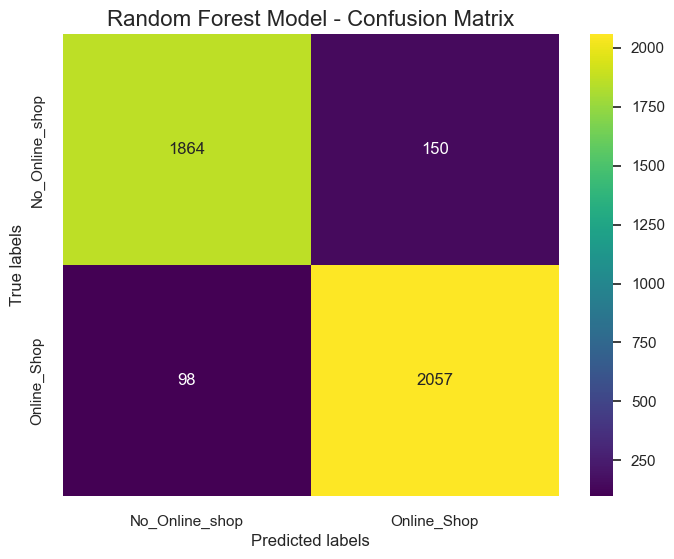

In [106]:
# Confusion matrix
labels = ['No_Online_shop', 'Online_Shop']
cm = confusion_matrix(y_test, predictions_rfc)

plt.figure(figsize=(8, 6))
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, cmap='viridis', fmt='g')

ax.set_xlabel('Predicted labels',fontsize=12)
ax.set_ylabel('True labels',fontsize=12)
ax.set_title('Random Forest Model - Confusion Matrix',fontsize=16)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels);

# 6. Feature Importances

In [107]:
columns_names = ['adm', 'adm_dur', 'inf', 'inf_dur', 'prod_rel', 'prod_rel_dur',
       'bounces', 'exit', 'pg_val', 's_day', 'month', 'browser', 'visitor', 'kend']

In [108]:
# Feature importances
feature_importance = rfc_best.feature_importances_
feature_importance_dict = dict(zip(columns_names, feature_importance))

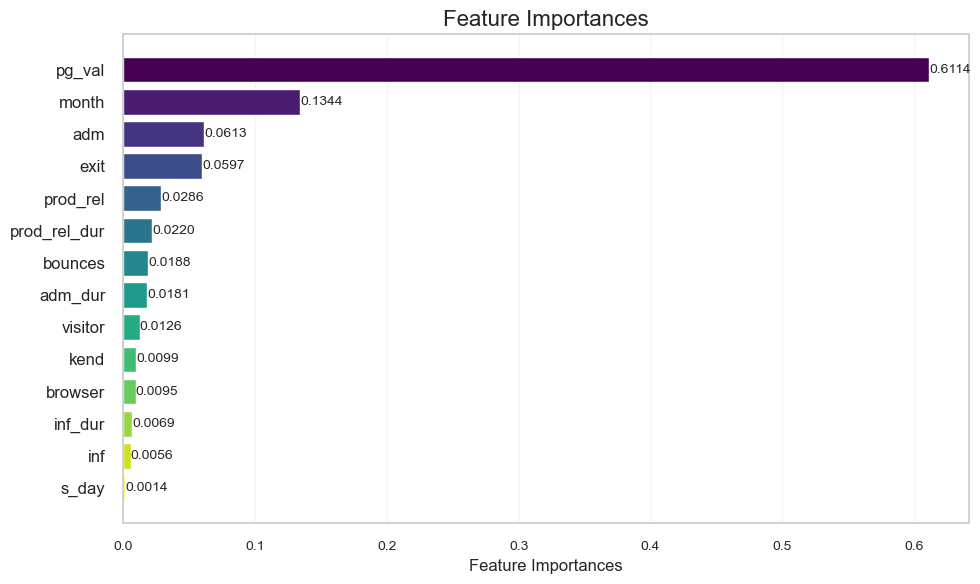

In [109]:
# Plot Feature importances
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
features, importances = zip(*sorted_feature_importance)

viridis_colors = plt.cm.viridis(np.linspace(0, 1, len(importances)))
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color=viridis_colors)
plt.xlabel('Feature Importances', fontsize=12)
plt.title('Feature Importances', fontsize=16)
plt.gca().invert_yaxis()  
plt.yticks(fontsize=12)
plt.xticks(fontsize=10)

for index, value in enumerate(importances):
    plt.text(value, index, f'{value:.4f}', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.grid(axis='x', alpha=0.2)
plt.grid(axis='y', linestyle='') 
plt.show()

# 7. SHapley Additive exPlanations (Shap)

In [110]:
# Calculate SHAP values on the test set
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)

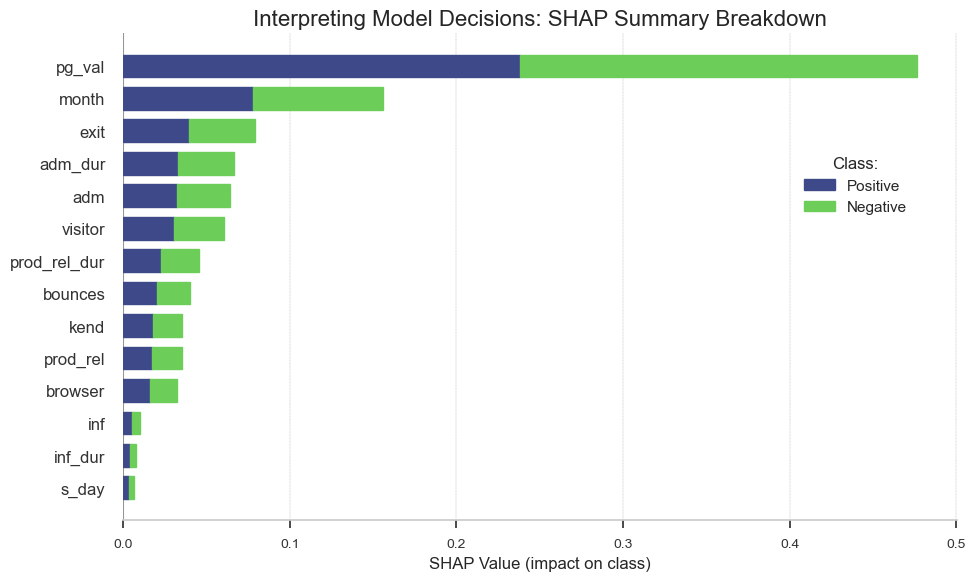

In [111]:
# Create the summary plot with default colors for both classes
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=columns_names, class_names=["Negative", "Positive"], show=False)

plt.gcf().set_facecolor('white')
plt.gcf().set_size_inches(10, 6)
custom_colors = ['#3E4989', '#6DCD59']  

# Retrieve the bar plot and modify the colors for each class
bars = plt.gcf().get_axes()[0].patches

# Iterate through the bars and set the custom colors for each class
for i, bar in enumerate(bars):
    if i < len(bars) // 2: 
        bar.set_color(custom_colors[0])
    else:  
        bar.set_color(custom_colors[1])

plt.xlabel("SHAP Value (impact on class)", fontsize=12)
plt.title("Interpreting Model Decisions: SHAP Summary Breakdown", fontsize=16)
plt.tight_layout()
plt.yticks(fontsize=12)
plt.xticks(fontsize=10)
plt.legend(loc='lower left', bbox_to_anchor=(0.8, 0.6), title='Class:', title_fontsize='12')
plt.grid(axis='x', linestyle='--', linewidth=0.2, color='gray')
plt.grid(axis='y', linestyle='')
plt.show()

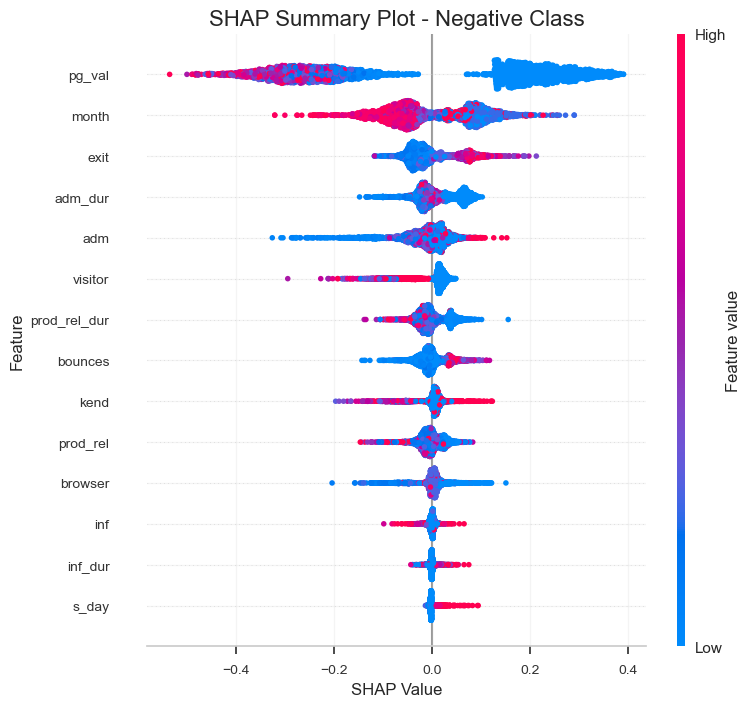

In [112]:
# Create a summary plot 
shap.summary_plot(shap_values[0], X_test, feature_names=columns_names, show=False)

plt.title('SHAP Summary Plot - Negative Class', fontsize=16)
plt.xlabel('SHAP Value', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(alpha=0.2)
plt.show()

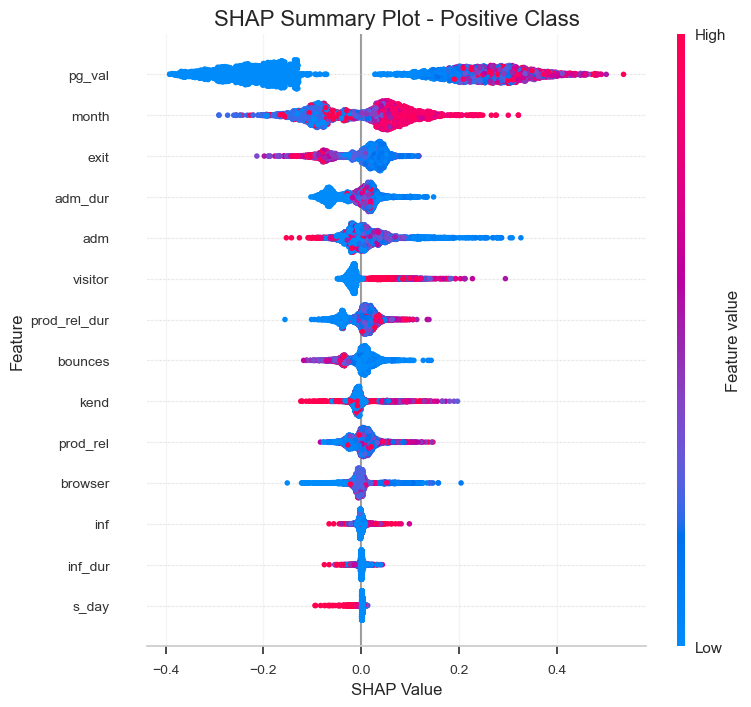

In [113]:
# Create SHAP Summary Plot - Positive Class
shap.summary_plot(shap_values[1], X_test, feature_names=columns_names, show=False)

plt.title('SHAP Summary Plot - Positive Class', fontsize=16)
plt.xlabel('SHAP Value', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(alpha=0.2)
plt.show()

In [114]:
index_for_test = 8

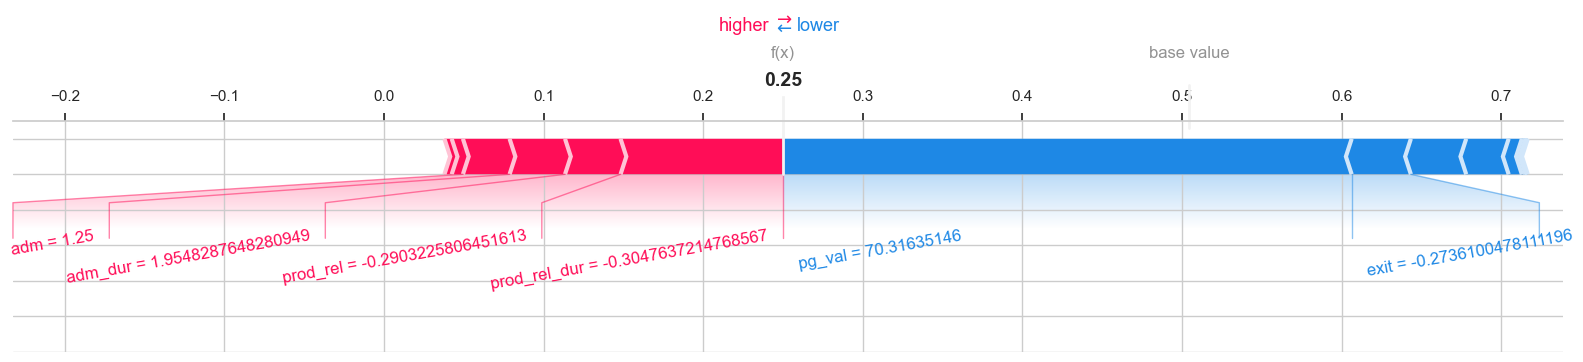

In [115]:
shap.plots.force(explainer.expected_value[0], shap_values[0][index_for_test, :], X_test[index_for_test, :], matplotlib=True, feature_names=columns_names,
                 text_rotation=10, show=False)

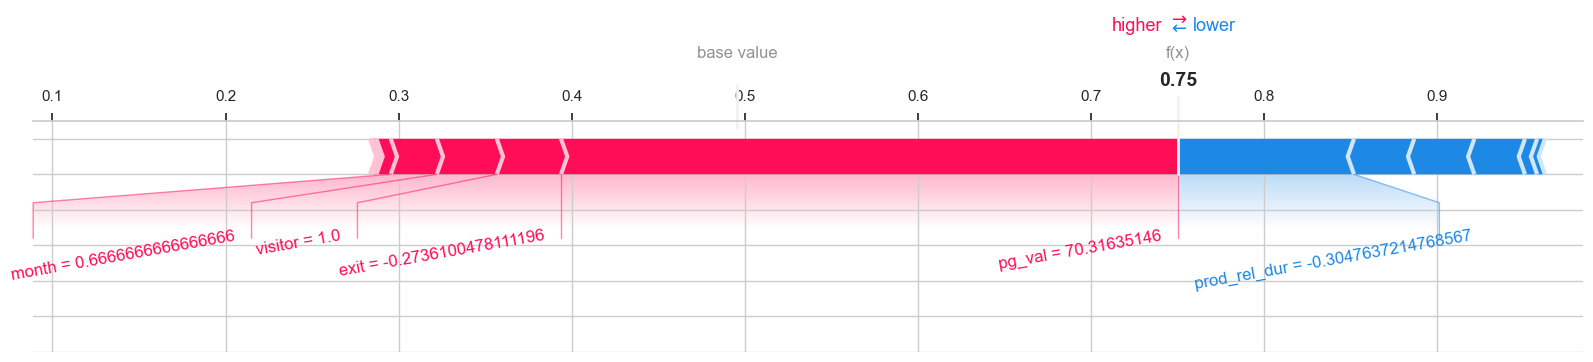

In [116]:
shap.plots.force(explainer.expected_value[1], shap_values[1][index_for_test, :], X_test[index_for_test, :], matplotlib=True, feature_names=columns_names,
                 text_rotation=10, show=False)

In [117]:
y_test[index_for_test]

1

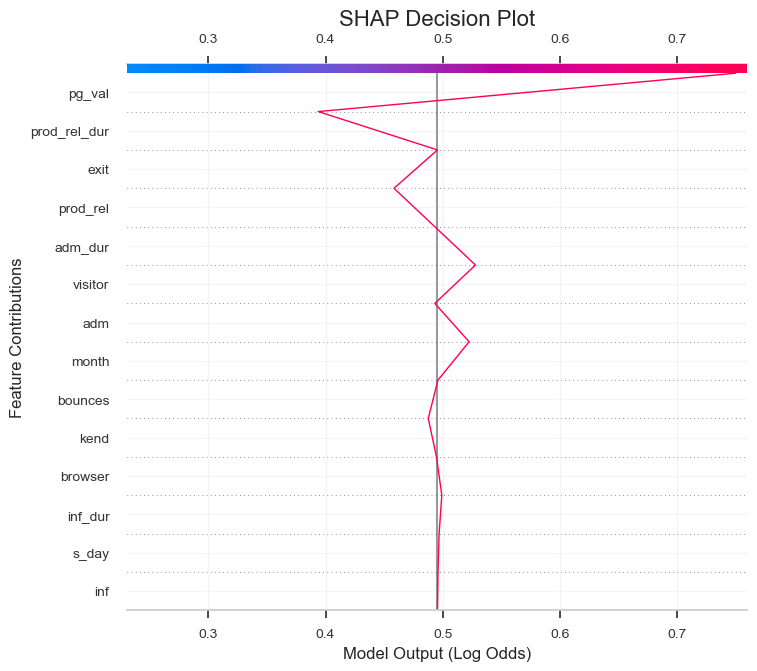

In [120]:
# Create SHAP Decision Plot
shap.decision_plot(explainer.expected_value[1], shap_values[1][index_for_test, :], feature_names=columns_names, show=False)

plt.title('SHAP Decision Plot', fontsize=16)
plt.xlabel('Model Output (Log Odds)', fontsize=12)
plt.ylabel('Feature Contributions', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(alpha=0.2)

plt.show()

# 8. Conclusions (Tests and Experimentations)

* During the process of testig diferent scenarios for the Machine Learning Models, When we deleted or replace outliers, our models performance went low.
* To balance our dataset we have tried both NearMiss and SMOTE techniques. However, the performance using SMOTE Techniques are better. On the other hand, we decided that reduce the observations is not an appropriated appoache because it could bring issues like the curse of dimensionality.
* To Normalize our dataset, we have tried Scale, StandardScaled and MinMaxScaler. The  Robust Scaler is the optimal solution.
* Tests were performed, including the Principal Componentes Analysis (PCA) . It reduced our attributes to 3. However, the Machine Learning worked poorly since it reduced our accuracy.

In [119]:
Well Done Natalia!!!

SyntaxError: invalid syntax (2529457252.py, line 1)

In [ ]:
Bounce rate=Average bounce rate value of the pages visited by the visitor.
Exit rate=Average exit rate value of the pages visited by the visitor .
Page value=Average page value of the pages visited by the visitor.

In [ ]:
['#440154', '#482878', '#3E4989', '#31688E', '#26828E', '#1F9E89', '#35B779', '#6DCD59', '#B4DD2C', '#FDE725']


High Contrast:

'#440154' (Dark Purplish)
'#FDE725' (Bright Yellow)
Moderate Contrast:

'#3E4989' (Dark Blue)
'#6DCD59' (Green)
Subtle Contrast:

'#26828E' (Teal)
'#B4DD2C' (Lime Green)

In [ ]:
https://support.google.com/analytics/answer/2695658?hl=enb

In [ ]:
[UA] How Page Value is calculated
Understand the relative value of pages on your site.
At a glance
Page Value is the average value for a page that a user visited before landing on the goal page or completing an Ecommerce transaction (or both). This value is intended to give you an idea of which page in your site contributed more to your site's revenue. If the page wasn't involved in an ecommerce transaction for your website in any way, then the Page Value for that page will be $0 since the page was never visited in a session where a transaction occurred.

Below is the equation you can follow to calculate Page Value. Please note that the unique pageview statistic represents the number of individual users who have loaded a given page per session. Each user is counted only once per session, no matter how many pages are opened by the same user.

Ecommerce Revenue + Total Goal Value
Number of Unique Pageviews for Given Page

# 7. Appendix

## Appendix: ML tests

## Appendix: Balancing tests

#### NearMiss Technique

In [ ]:
nr = NearMiss()
X_train, y_train = nr.fit_resample(X_train, y_train)

## Appendix: Normalization Tests

### StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Scale

In [ ]:
from sklearn.preprocessing import scale

In [ ]:
X_scaled = scale(X)

### MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

## Appendix: PCA test

In [ ]:
df_no_label = DataForML.drop(columns=["rev"])
df_no_label.shape

In [ ]:
pca = PCA().fit(df_no_label)

In [ ]:
pca = PCA().fit(X)

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Explained Variance Ratio',fontsize = 12)
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8)
plt.xlim(0,10)
sns.set(color_codes=True);

In [ ]:
pca = PCA(3)
df_projected = pca.fit_transform(X)

In [ ]:
col_names = ['col_' + str(i) for i in range(1, 4)]
print(col_names)

In [ ]:
pca_df = pd.DataFrame(df_projected, columns =['col_1', 'col_2', 'col_3'])

In [ ]:
pca_df["rev"] = DataForML["rev"]

In [ ]:
pca_df.head()

In [ ]:
print('STATUS: Original Shape (before PCA): ', X.shape)
print('STATUS: Transformed Shape (after PCA): ',pca_df.shape)